## Bayesian Modelling and Data Analysis- Assignment 2

For the Full Question, please refer to - https://github.com/ritwik007/CGS698C/blob/main/ass2.pdf

You have to analyse the experimental data and write an analysis. Here are some major points you must cover.

(a) Construct a dependency diagram for the model choosing relevant priors and justifying your choice of
priors.

(b) Run MCMC simulations, plot the distributions and 95% HDI intervals, choose credible values for parameters and draw conclusions.

(c) Are all 40 participant behaviours similar or are there individual variations that can be grouped such
that the 40 participants can grouped into two or more categories based on the performance data? Use
visualisation to see if you spot any patterns then do an analysis based on the patterns you see. In
particular you may need a new dependency model.

(d) We chose the bias parameter b = 0:5 assuming no bias between the two categories. Is that a good choice?
Check to see what happens if b is allowed to be a free parameter that is estimated by the data.

(e) Do a post predictive check to see if your chosen model parameters fit the data well. Can you think of
other models for the data? If yes, then fit these other models to the data and pick a ‘best’ model. On
what basis do you say it is best?

# Importing Required Libraries

In [2]:
import matplotlib.pyplot  as plt
import numpy as np
from scipy.stats import beta
from matplotlib.figure import Figure
import pymc3 as pm
import arviz as az
from scipy.stats import beta
from scipy.stats import bernoulli
import warnings;
import pandas as pd
import math
import graphviz
import seaborn as sns

#  Importing Data

In [3]:
dict={'y': [[245], [218], [255], [126], [182], [71], [102], [65]], 'd1': [[0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0]], 'd2': [[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0]], 'nstim': 8, 'nsubj': 40, 'a': [1, 1, 1, 2, 1, 2, 2, 2], 'x': [[5, 6, 6, 2, 4, 1, 3, 1], [5, 6, 8, 0, 3, 1, 5, 2], [7, 7, 8, 6, 1, 2, 2, 3], [7, 7, 6, 3, 5, 4, 0, 1], [8, 6, 8, 7, 3, 3, 1, 0], [8, 7, 8, 3, 4, 0, 0, 0], [6, 5, 5, 3, 3, 1, 4, 1], [8, 8, 6, 4, 4, 0, 1, 0], [7, 8, 8, 4, 7, 0, 3, 0], [8, 8, 8, 7, 4, 1, 1, 0], [8, 8, 8, 3, 3, 0, 1, 0], [7, 6, 7, 4, 3, 1, 1, 0], [7, 8, 7, 1, 3, 0, 0, 3], [7, 6, 8, 2, 5, 0, 1, 0], [8, 4, 6, 5, 4, 3, 4, 2], [7, 7, 8, 5, 4, 5, 2, 0], [8, 8, 7, 3, 5, 0, 1, 0], [8, 6, 7, 6, 4, 2, 1, 1], [8, 6, 8, 1, 2, 0, 1, 0], [8, 6, 8, 4, 5, 1, 0, 0], [5, 6, 6, 3, 1, 2, 2, 1], [3, 4, 4, 5, 4, 5, 1, 2], [3, 3, 5, 3, 7, 2, 5, 5], [5, 3, 6, 2, 4, 1, 5, 1], [5, 6, 6, 1, 7, 1, 3, 3], [8, 7, 3, 4, 7, 5, 2, 0], [6, 3, 7, 3, 6, 1, 5, 6], [8, 8, 6, 3, 5, 1, 0, 0], [2, 3, 4, 2, 7, 6, 6, 4], [6, 5, 6, 1, 4, 1, 1, 1], [4, 2, 3, 3, 4, 5, 4, 6], [6, 6, 6, 2, 7, 2, 1, 1], [5, 1, 7, 0, 6, 0, 7, 3], [4, 2, 5, 0, 6, 1, 8, 4], [7, 6, 7, 6, 3, 1, 0, 3], [6, 7, 3, 4, 8, 6, 2, 3], [8, 7, 7, 3, 6, 1, 2, 1], [3, 3, 5, 3, 2, 3, 4, 3], [4, 0, 8, 0, 7, 0, 7, 1], [2, 3, 6, 5, 5, 2, 5, 3]], 'n': 8}

In [4]:
d1=pd.DataFrame(dict['d1'])
d2=pd.DataFrame(dict['d2'])
x=np.array(dict['x'])
y=np.sum(x,axis=0)

In [5]:
print(d1)
print(d2)
print(y)

         0        1        2        3        4        5        6        7
0  0.00000  0.00000  1.00005  1.00005  1.95205  1.95205  3.11310  3.11310
1  0.00000  0.00000  1.00005  1.00005  1.95205  1.95205  3.11310  3.11310
2  1.00005  1.00005  0.00000  0.00000  0.95200  0.95200  2.11305  2.11305
3  1.00005  1.00005  0.00000  0.00000  0.95200  0.95200  2.11305  2.11305
4  1.95205  1.95205  0.95200  0.95200  0.00000  0.00000  1.16105  1.16105
5  1.95205  1.95205  0.95200  0.95200  0.00000  0.00000  1.16105  1.16105
6  3.11310  3.11310  2.11305  2.11305  1.16105  1.16105  0.00000  0.00000
7  3.11310  3.11310  2.11305  2.11305  1.16105  1.16105  0.00000  0.00000
         0        1        2        3        4        5        6        7
0  0.00000  1.17505  0.82900  2.23000  0.82900  2.23000  0.00000  1.17505
1  1.17505  0.00000  2.00405  1.05495  2.00405  1.05495  1.17505  0.00000
2  0.82900  2.00405  0.00000  3.05900  0.00000  3.05900  0.82900  2.00405
3  2.23000  1.05495  3.05900  0.00000 

#  a) and b)

Basic Model without any subgroups

P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 23 seconds.
P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'r\n0'}>],
       [<AxesSubplot:title={'center':'r\n1'}>,
        <AxesSubplot:title={'center':'r\n2'}>,
        <AxesSubplot:title={'center':'r\n3'}>],
       [<AxesSubplot:title={'center':'r\n4'}>,
        <AxesSubplot:title={'center':'r\n5'}>,
        <AxesSubplot:title={'center':'r\n6'}>],
       [<AxesSubplot:title={'center':'r\n7'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

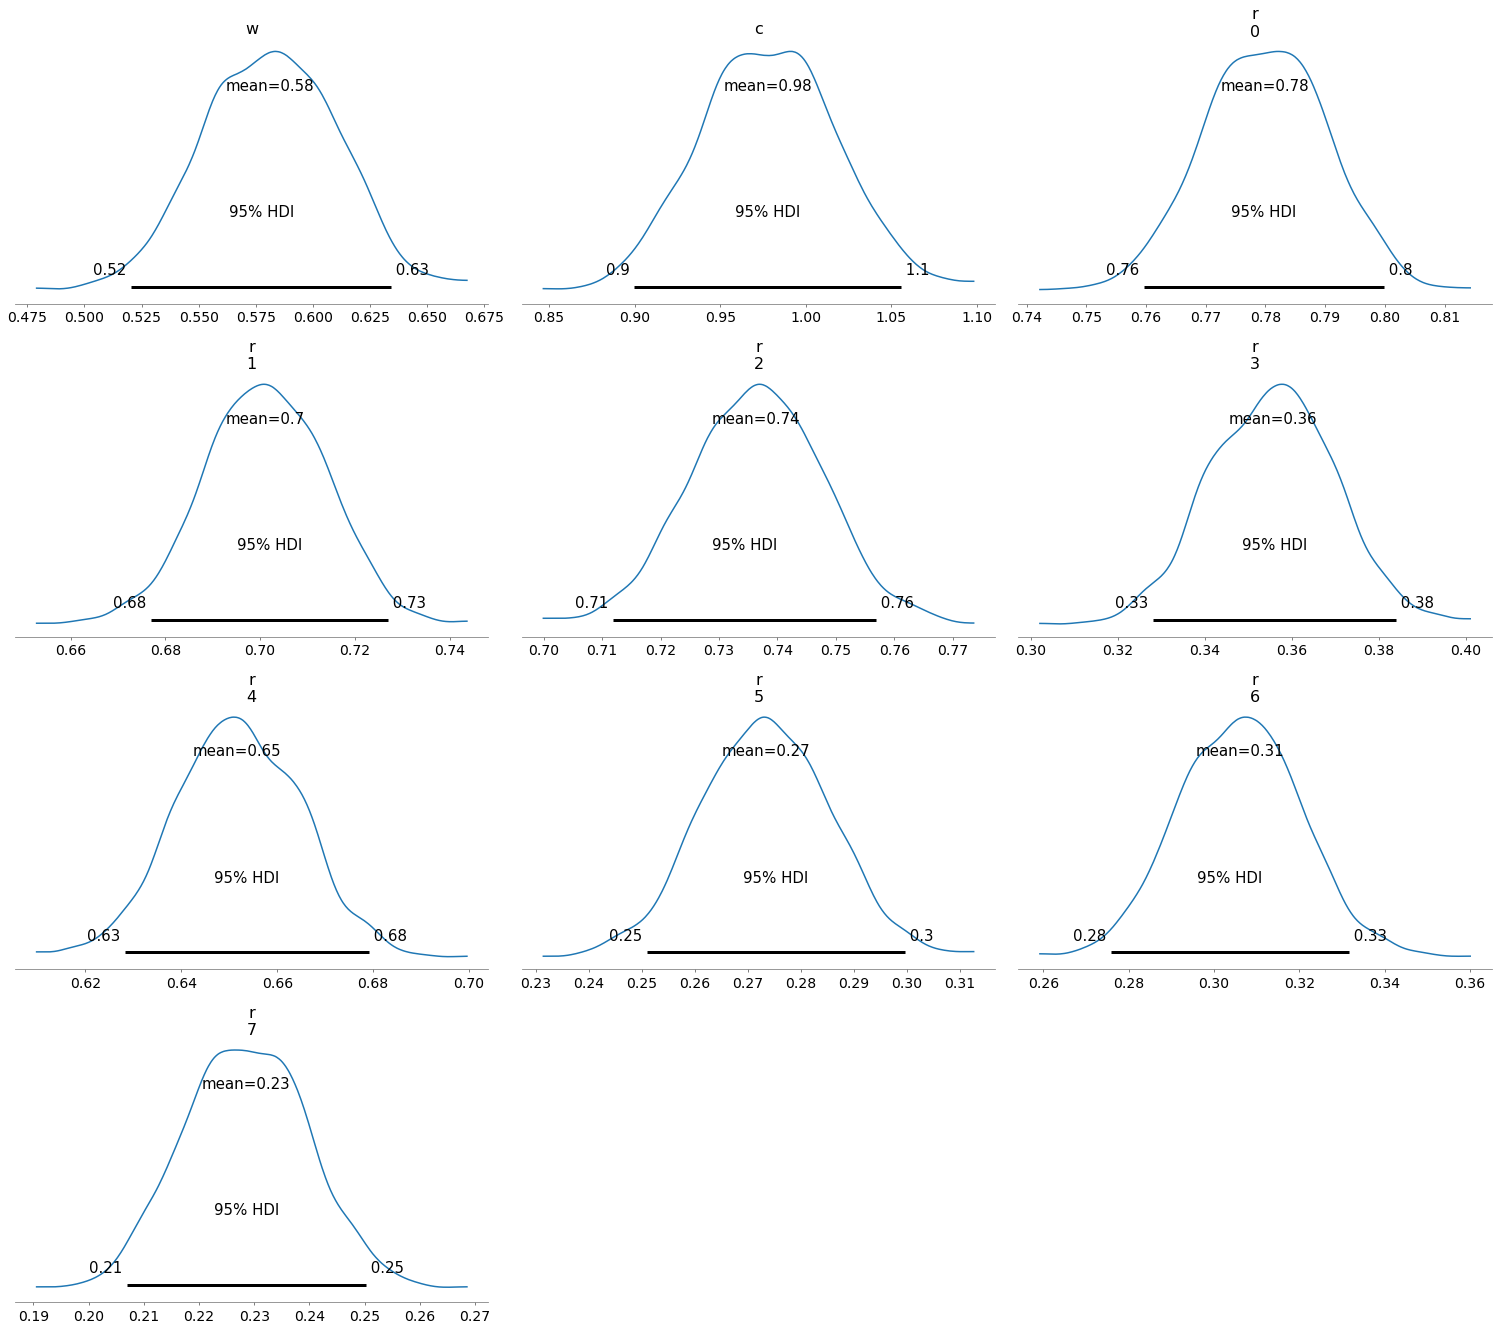

In [73]:
 with pm.Model() as model1:
  w=pm.Beta('w',4,4)
  c=pm.Exponential('c',1)
  d3_a=(w*d1[[0,1,2,4]]+(1-w)*d2[[0,1,2,4]])
  s1=np.exp(-c*d3_a)
  d3_b=(w*d1[[3,5,6,7]]+(1-w)*d2[[3,5,6,7]])
  s2=np.exp(-c*d3_b)
  s_a=s1.sum(axis=1)
  s_b=s2.sum(axis=1)
  r=pm.Deterministic('r',(s_a/(s_a+s_b)))
  y_i=pm.Binomial('y_i',n=320,p=r,observed=y)
  trace_1 = pm.sample(1000)

az.plot_posterior(trace_1,hdi_prob=0.95)

In [14]:
az.summary(trace_1)

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
w,0.582,0.029,0.525,0.634,0.001,0.000,1767.0,1749.0,1782.0,1283.0,1.0
c,0.981,0.040,0.912,1.059,0.001,0.001,1858.0,1858.0,1855.0,1348.0,1.0
r[0],0.781,0.010,0.762,0.800,0.000,0.000,1889.0,1889.0,1889.0,1521.0,1.0
r[1],0.702,0.012,0.679,0.725,0.000,0.000,1871.0,1869.0,1881.0,1415.0,1.0
r[2],0.737,0.011,0.716,0.758,0.000,0.000,1734.0,1734.0,1766.0,1213.0,1.0
r[3],0.356,0.014,0.331,0.383,0.000,0.000,1749.0,1731.0,1766.0,1245.0,1.0
r[4],0.652,0.013,0.627,0.674,0.000,0.000,1745.0,1745.0,1767.0,1215.0,1.0
r[5],0.273,0.012,0.250,0.295,0.000,0.000,1743.0,1711.0,1769.0,1196.0,1.0
r[6],0.305,0.014,0.279,0.331,0.000,0.000,1860.0,1860.0,1874.0,1374.0,1.0
r[7],0.228,0.011,0.207,0.249,0.000,0.000,1899.0,1891.0,1895.0,1600.0,1.0


# Model Dependency Diagram 

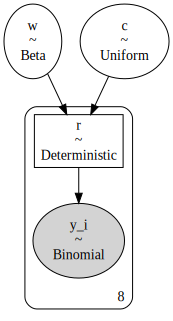

In [15]:
pm.model_to_graphviz(model1)

# Justification for choosing Priors and Interpretations of Results

Priors for w- 
'w' is the parameter that denotes bias given to either of the dimnsions Height or Position while making the decision. Since, I don't have any specific information about how the participants classified the Stimuli and what they were told, I felt that it was right to assume that equal bias would be given to both Hieght and Position. Therefore, I decided to choose Beta(4,4) as my prior which has a mode at 0.5 with decent variability around the mode.

Priors for c-
'c' is the generalization parameter. Low value of such a parameter will result in high similarity between the Categories and vice-versa. Ideally, we would like the value to be near 1 which is not high and not very low so that similarity between two categories is not high. As, we don't have any strong prior information, I have decided to choose Exponential(1) as the prior whose Mean is 1 and assigns low probability to values extremely high. 

Credible Values 
w- 0.582
c- 0.981

From the results, we see that there is a bias towards the dimension 'Position' while classifying Stimuli in 2 categories and the value of c is near 1 which is what we wanted in an ideal situation. 
A bias towards the dimension 'Position' indicates that many of the participants may have been told to consider Position of the Line as a rule while classifying into two categories


# Posterior-Predictive Plot 

<AxesSubplot:xlabel='y_i'>

P:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


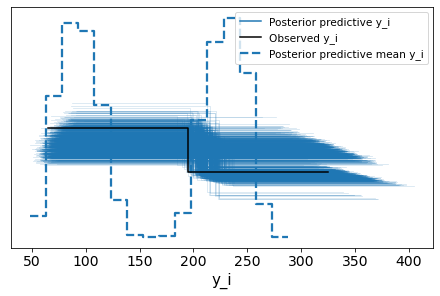

In [54]:
with model1:
      ppc = pm.sample_posterior_predictive(
              trace_1, random_seed=10
      )
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model1))        
        

# c)

# Checking if there any group type behaviour in Participants

First,I plot data of Participants for each Stimuli and then I plot Data of Each Participant Independently

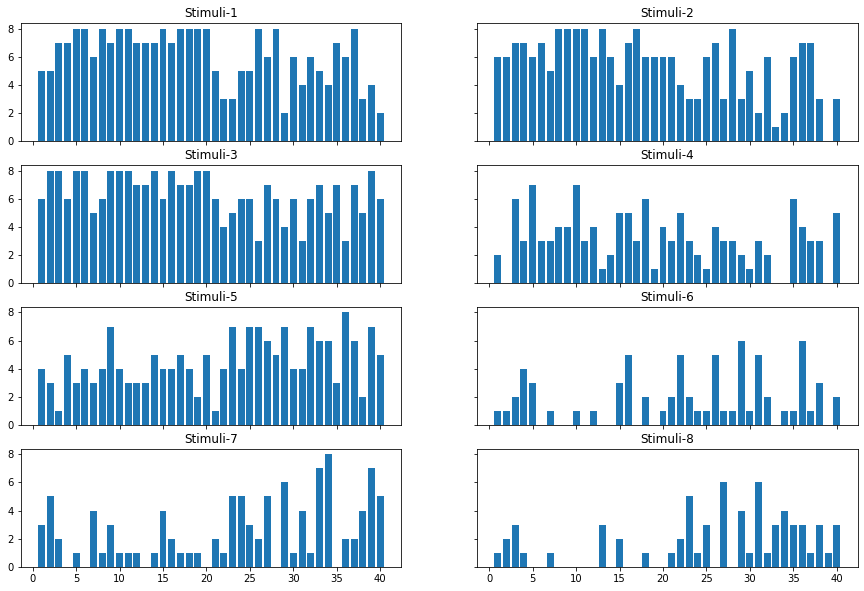

In [30]:
val=np.array(range(40))+1
val1=[1,2,3,4,5,6,7,8]
figure,ax1=plt.subplots(4,2,figsize=(15,10),sharex=True,sharey=True)
for i in [0,1,2,3]:
    for j in [0,1]:
           index=2*i+j  
           ax1[i,j].bar(height=x[:,index],x=val)
           ax1[i,j].set_title("Stimuli-{}".format(index+1))


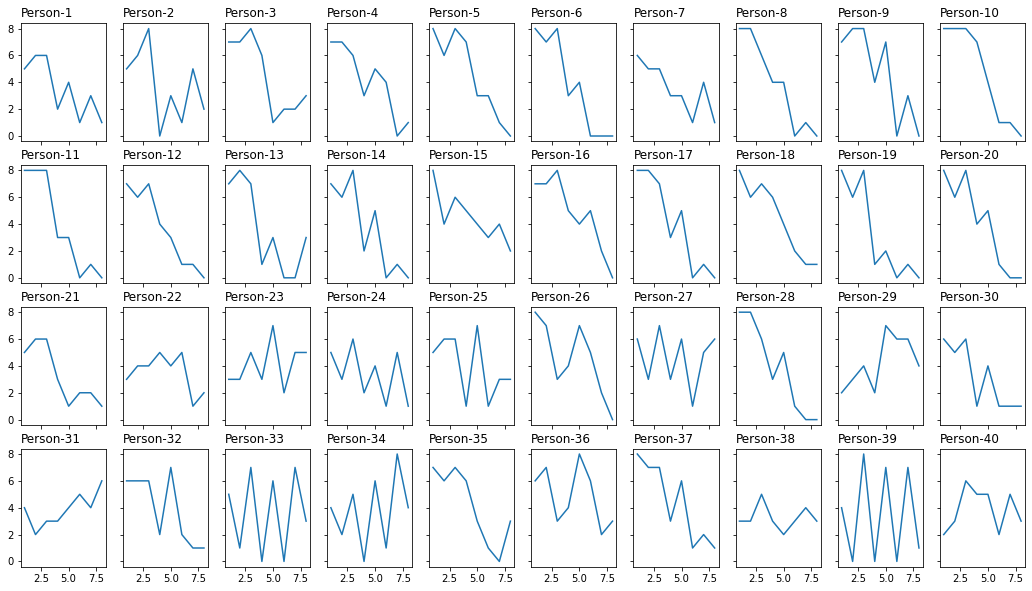

In [36]:
figure1,ax2=plt.subplots(4,10,figsize=(18,10),sharex=True,sharey=True)
for i in range(4):
    for j in range(10):
           index=10*i+j   
           ax2[i,j].plot(val1,x[index,:])
           ax2[i,j].set_title("Person-{}".format(index+1),loc="left")
          

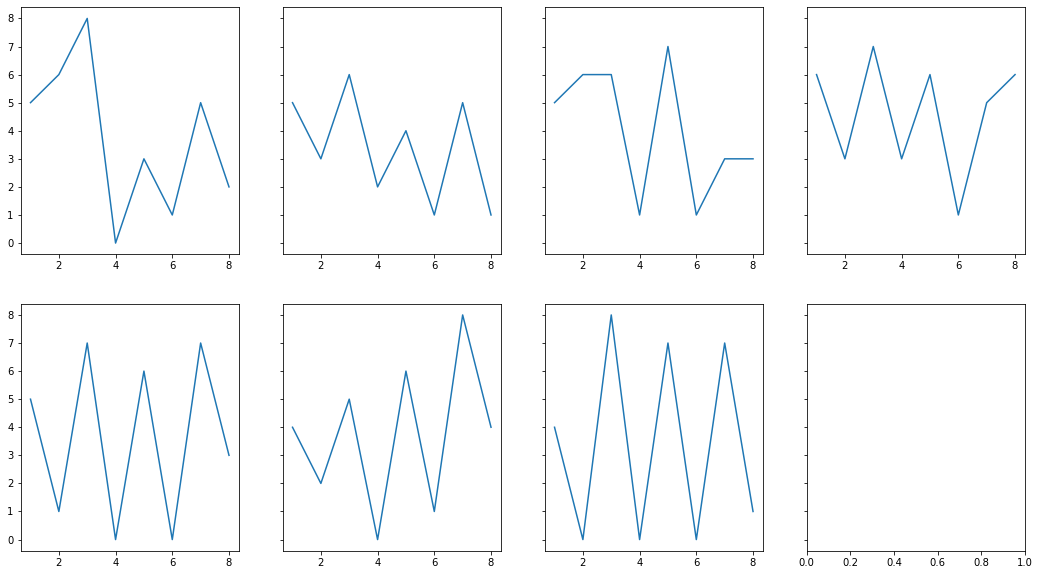

In [116]:
# Errors at 2nd or 7th Stimuli 
g1=[2,24,25,27,33,34,39]

figure,ax4=plt.subplots(2,4,figsize=(18,10),sharey=True)
ax4[0,0].plot(val1,x[1,:])
ax4[0,1].plot(val1,x[23,:])
ax4[0,2].plot(val1,x[24,:])
ax4[0,3].plot(val1,x[26,:])
ax4[1,0].plot(val1,x[32,:])
ax4[1,1].plot(val1,x[33,:])
ax4[1,2].plot(val1,x[38,:])

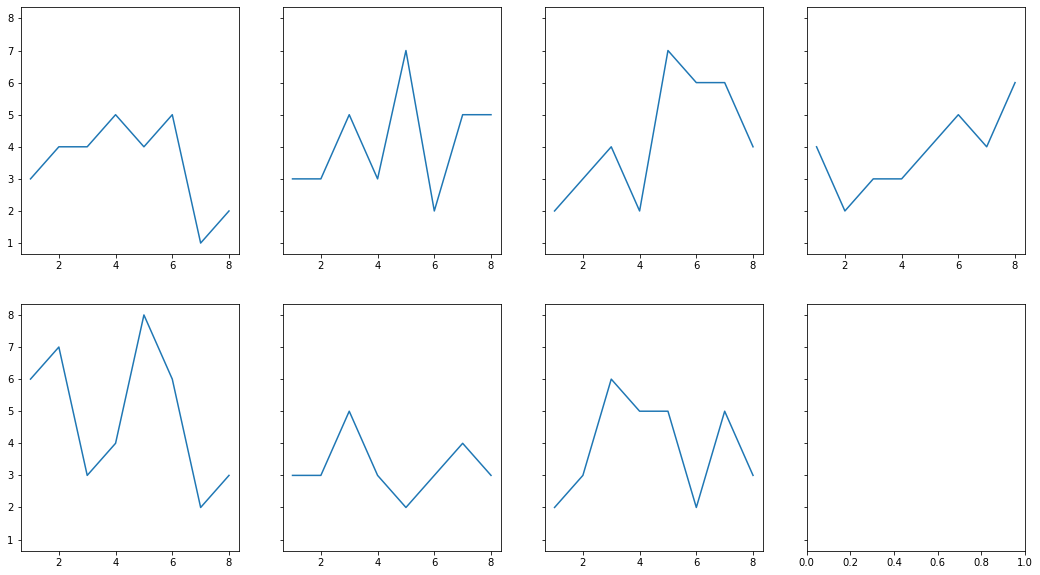

In [115]:
# Leftovers
g2=[22,23,29,31,36,38,40]

figure,ax4=plt.subplots(2,4,figsize=(18,10),sharey=True)
ax4[0,0].plot(val1,x[21,:])
ax4[0,1].plot(val1,x[22,:])
ax4[0,2].plot(val1,x[28,:])
ax4[0,3].plot(val1,x[30,:])
ax4[1,0].plot(val1,x[35,:])
ax4[1,1].plot(val1,x[37,:])
ax4[1,2].plot(val1,x[39,:])

In [119]:
g1=[2,24,25,27,33,34,39]
g2=[22,23,29,31,36,38,40]
g3=[ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 26, 28, 30, 32, 35, 37] 

In [110]:
g1

[2, 24, 27, 33, 34, 39]

# Grouping Rule

On the basis of Visual Analysis, I found that there seems to be 3 type of Groups among the Participants.
One of the groups( Present in array g3) show clear decreasing pattern and seem to classify correctly most of the time. Most of the members in this group are from Participants 1-20

Other 2 groups present show a certain type of zig zag pattern in almost all the cases. On plotting the remaining participants iteratively, it was observed that there seems to be a group which is making errors at 2nd and 7th Stimuli  (Mentioned in g1 array). 

The last group( mentioned in g2 array) contains all those elements which fit in neither of these groups and do not seem to follow any common visual pattern. 

# Modelling Data based on Groups 

Creating different 'y' for each Group


In [120]:

l1=x[g1-np.array(1),:].sum(axis=0)
l2=x[g2-np.array(1),:].sum(axis=0)
l3=x[g3-np.array(1),:].sum(axis=0)
print(l1)
print(l2)
print(l3)

[34 21 47  6 39  5 40 20]
[23 25 30 25 37 29 27 26]
[188 172 178  95 106  37  35  19]


# 1st Group
First I model the group which is making errors in 2nd and 7th Stimuli. Looking at the picture given in Assignment,
it is visible that both 2nd and 7th Stimuli have approximately same height. So it could be possible that this group 
is classifying on the basis of Height Dimension.  

Therefore, I specify the prior of 'w' as Beta(1,4) in order to reflect my prior understanding that this group has a 
bias towards dimension height.

I keep the prior of 'c' unchanged

P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 26 seconds.
P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'r1\n0'}>],
       [<AxesSubplot:title={'center':'r1\n1'}>,
        <AxesSubplot:title={'center':'r1\n2'}>,
        <AxesSubplot:title={'center':'r1\n3'}>],
       [<AxesSubplot:title={'center':'r1\n4'}>,
        <AxesSubplot:title={'center':'r1\n5'}>,
        <AxesSubplot:title={'center':'r1\n6'}>],
       [<AxesSubplot:title={'center':'r1\n7'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

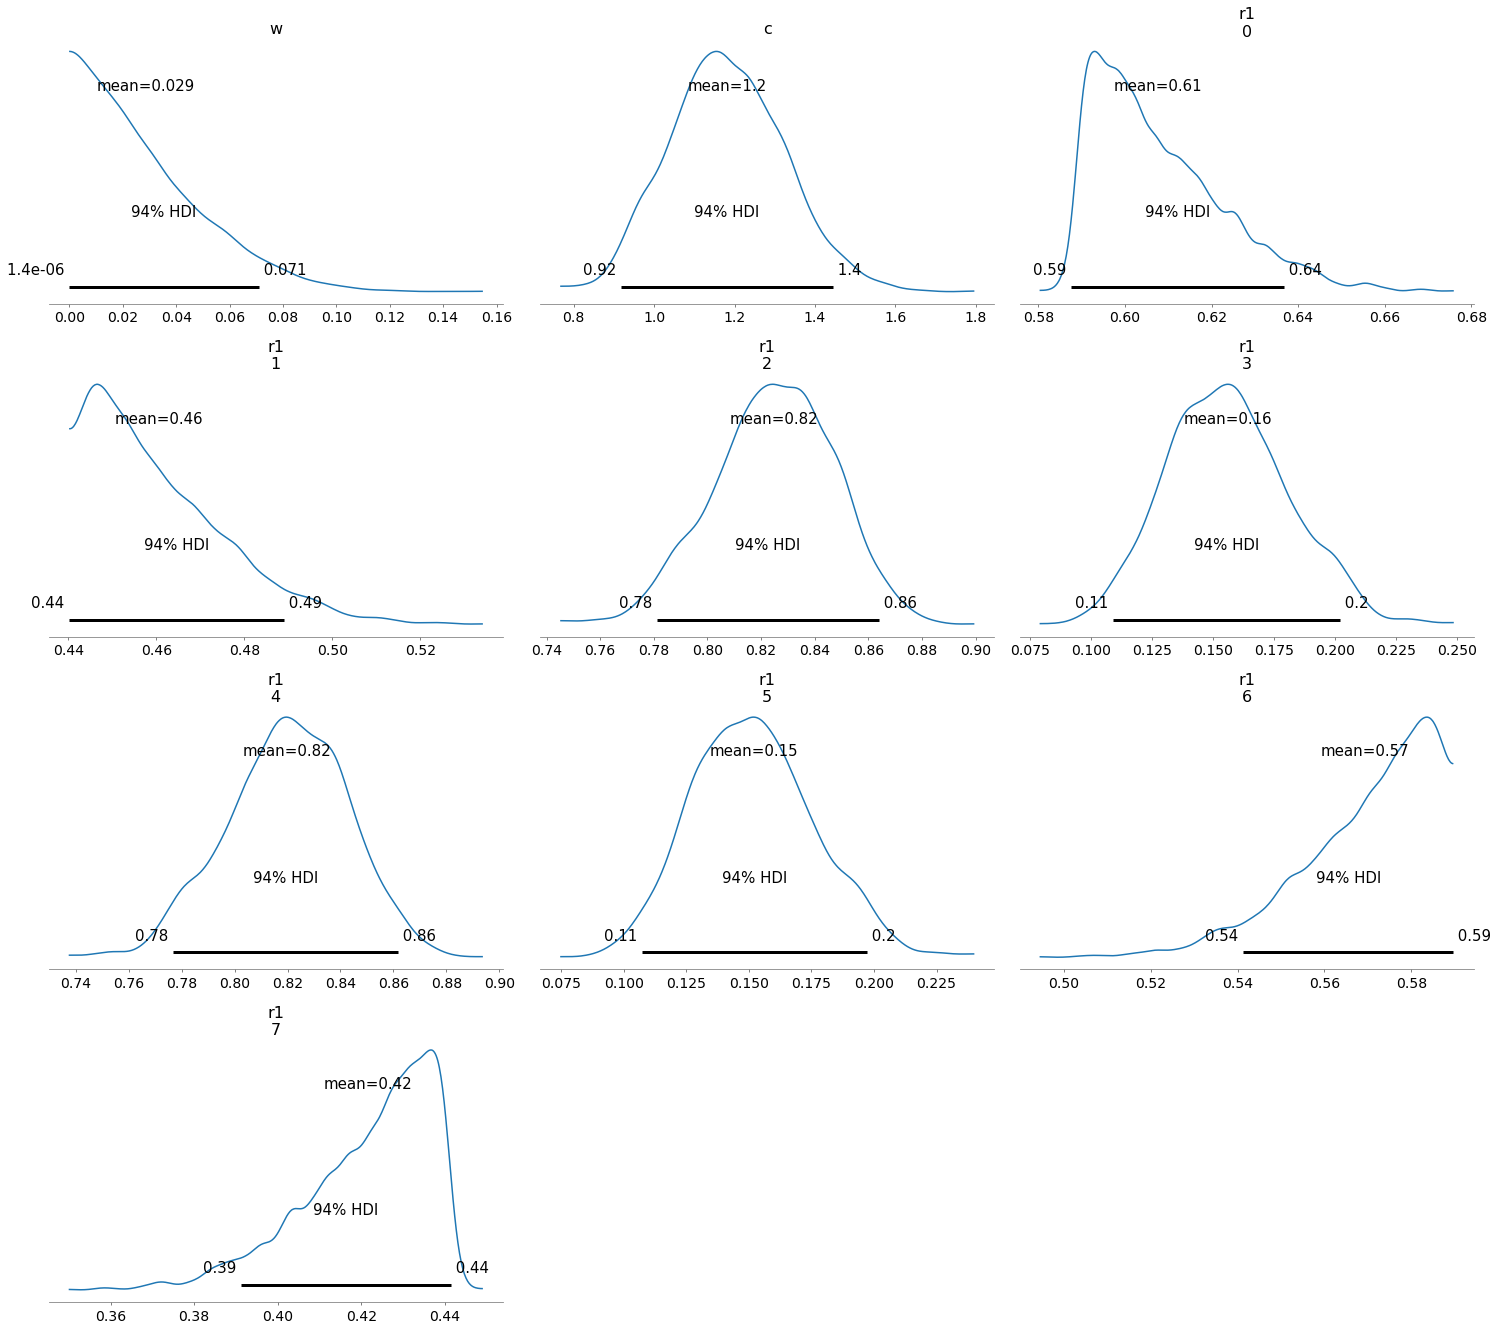

In [121]:
#On the basis of Height position
with pm.Model() as model21:
      w=pm.Beta('w',1,4)
      c=pm.Exponential('c',1)
      d3_a=(w*d1[[0,1,2,4]]+(1-w)*d2[[0,1,2,4]])
      s1=np.exp(-c*d3_a)
      d3_b=(w*d1[[3,5,6,7]]+(1-w)*d2[[3,5,6,7]])
      s2=np.exp(-c*d3_b)
      s_a=s1.sum(axis=1)
      s_b=s2.sum(axis=1)
      b1 = 0.5
      r1=pm.Deterministic('r1',(b1*s_a)/(b1*s_a+(1-b1)*s_b))
      y_1=pm.Binomial('y_1',n=56,p=r1,observed=l1)
      trace_21=pm.sample(2000)  

az.plot_posterior(trace_21,hdi_prob=0.95)   

In [142]:
group1=az.summary(trace_21,kind='stats')

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


# 2nd Group
Here, I model the group which is of leftover participants. It could be possible that this group 
is classifying erraticaly or without thinking as their graphs seem to indicate no pattern.  

Therefore, I specify the prior of 'w' as Beta(1,1) in order to reflect my prior understanding that this group is performing 
erraticaly and any value of w could be possible

I keep the prior of 'c' unchanged

P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 25 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'r2\n0'}>],
       [<AxesSubplot:title={'center':'r2\n1'}>,
        <AxesSubplot:title={'center':'r2\n2'}>,
        <AxesSubplot:title={'center':'r2\n3'}>],
       [<AxesSubplot:title={'center':'r2\n4'}>,
        <AxesSubplot:title={'center':'r2\n5'}>,
        <AxesSubplot:title={'center':'r2\n6'}>],
       [<AxesSubplot:title={'center':'r2\n7'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

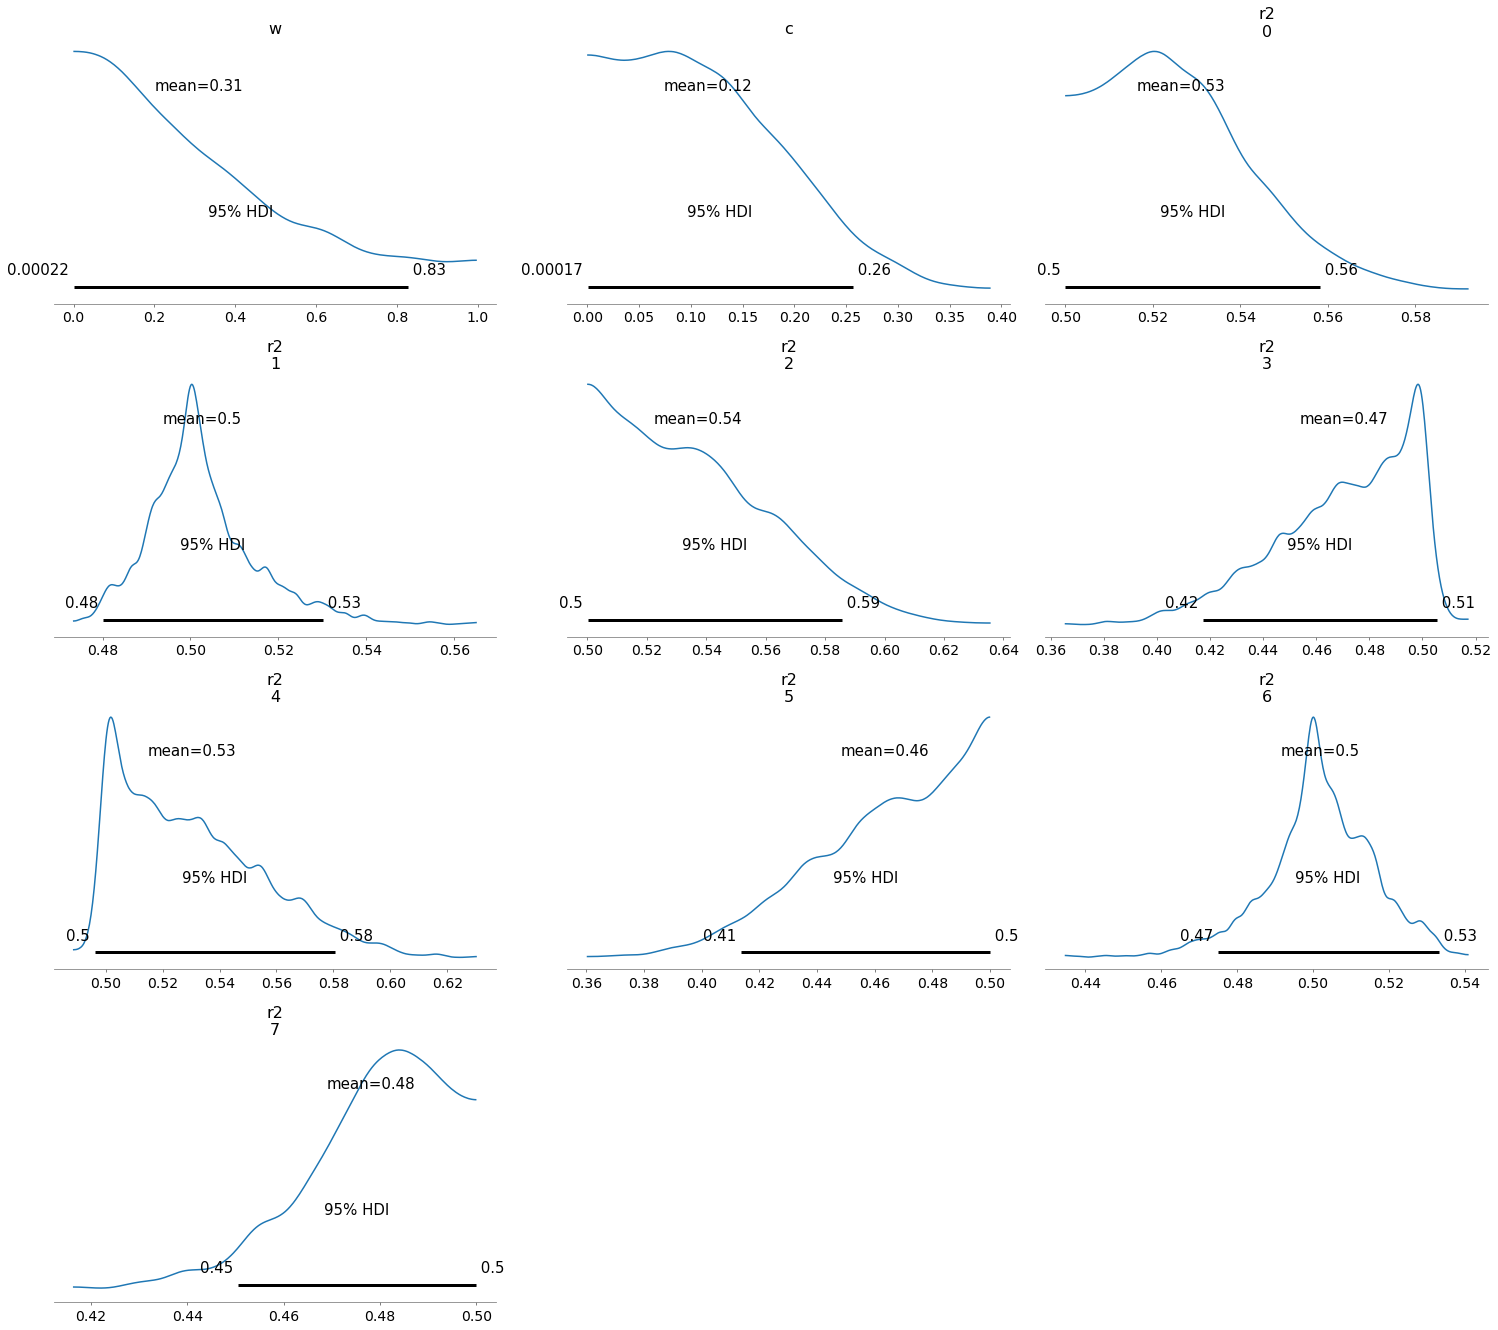

In [126]:
#On the basis of height
with pm.Model() as model22:
      w=pm.Beta('w',1,1)
      c=pm.Exponential('c',1)
      d3_a=(w*d1[[0,1,2,4]]+(1-w)*d2[[0,1,2,4]])
      s1=np.exp(-c*d3_a)
      d3_b=(w*d1[[3,5,6,7]]+(1-w)*d2[[3,5,6,7]])
      s2=np.exp(-c*d3_b)
      s_a=s1.sum(axis=1)
      s_b=s2.sum(axis=1)
      b2 =0.5
      r2=pm.Deterministic('r2',(b2*s_a)/(b2*s_a+(1-b2)*s_b))
      y_2=pm.Binomial('y_2',n=56,p=r2,observed=l2)
      trace_22=pm.sample(2000)  
  
az.plot_posterior(trace_22,hdi_prob=0.95)    

In [139]:
group2=az.summary(trace_22,kind='stats')

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


# 3rd Group
Here I model the group which seems to be classifying correctly and has a decreasing pattern in the graph.I thought that
these people would give equal weightage to both the dimensions.

Therefore, I specify the prior of 'w' as Beta(8,8) in order to reflect my prior understanding that this group has a 
no bias towards any dimension .

I keep the prior of 'c' unchanged

P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 26 seconds.
P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'r3\n0'}>],
       [<AxesSubplot:title={'center':'r3\n1'}>,
        <AxesSubplot:title={'center':'r3\n2'}>,
        <AxesSubplot:title={'center':'r3\n3'}>],
       [<AxesSubplot:title={'center':'r3\n4'}>,
        <AxesSubplot:title={'center':'r3\n5'}>,
        <AxesSubplot:title={'center':'r3\n6'}>],
       [<AxesSubplot:title={'center':'r3\n7'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

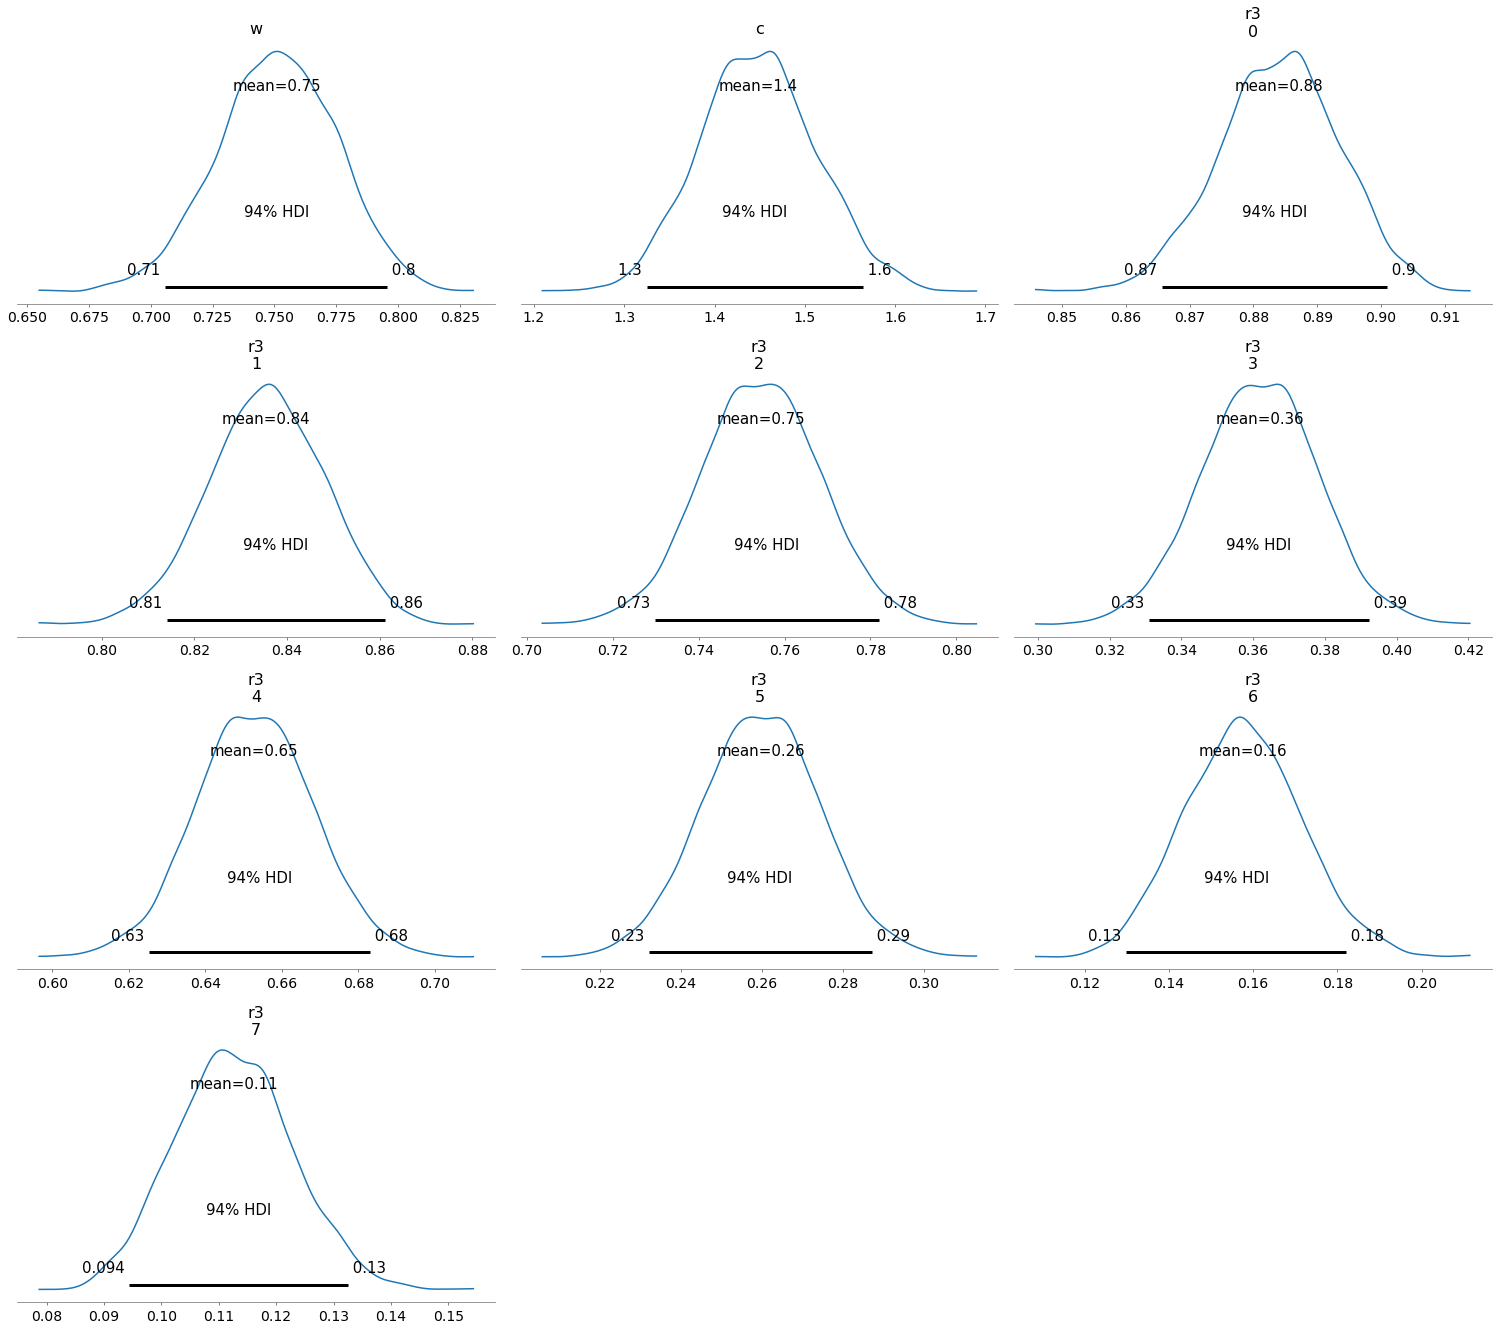

In [161]:
#On the basis of both height and position
with pm.Model() as model23:
      w=pm.Beta('w',8,8)
      c=pm.Exponential('c',1)
      d3_a=(w*d1[[0,1,2,4]]+(1-w)*d2[[0,1,2,4]])
      s1=np.exp(-c*d3_a)
      d3_b=(w*d1[[3,5,6,7]]+(1-w)*d2[[3,5,6,7]])
      s2=np.exp(-c*d3_b)
      s_a=s1.sum(axis=1)
      s_b=s2.sum(axis=1)
      b3 = 0.5
      r3=pm.Deterministic('r3',(b3*s_a)/(b3*s_a+(1-b3)*s_b))
      y_3=pm.Binomial('y_3',n=208,p=r3,observed=l3)
      trace_23=pm.sample(2000)  
  
az.plot_posterior(trace_23)      

In [152]:
group3=az.summary(trace_23,kind='stats')

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


# Exploring Difference in the 3 Groups

In [157]:
print("Group 1 Data\n\n",group1)
print("\n \n Group 2 Data\n\n",group2)
print("\n \n Group 3 Data\n\n",group3)

Group 1 Data

         mean     sd  hdi_3%  hdi_97%
w      0.029  0.023   0.000    0.071
c      1.181  0.142   0.917    1.445
r1[0]  0.608  0.015   0.588    0.637
r1[1]  0.461  0.016   0.440    0.489
r1[2]  0.825  0.022   0.781    0.864
r1[3]  0.156  0.025   0.109    0.202
r1[4]  0.820  0.023   0.777    0.862
r1[5]  0.152  0.024   0.107    0.197
r1[6]  0.569  0.015   0.541    0.590
r1[7]  0.422  0.016   0.391    0.442

 
 Group 2 Data

         mean     sd  hdi_3%  hdi_97%
w      0.309  0.246   0.000    0.800
c      0.117  0.077   0.000    0.250
r2[0]  0.526  0.017   0.500    0.556
r2[1]  0.503  0.013   0.479    0.527
r2[2]  0.537  0.026   0.500    0.583
r2[3]  0.470  0.026   0.421    0.506
r2[4]  0.530  0.025   0.496    0.577
r2[5]  0.464  0.027   0.417    0.500
r2[6]  0.502  0.014   0.474    0.530
r2[7]  0.478  0.015   0.452    0.500

 
 Group 3 Data

         mean     sd  hdi_3%  hdi_97%
w      0.751  0.024   0.702    0.793
c      1.448  0.065   1.321    1.564
r3[0]  0.884  0.010   

In [158]:
# az.summary(trace_23)
w1_sample = trace_21['w']
w2_sample = trace_22['w']
w3_sample = trace_23['w']

c1_sample = trace_21['c']
c2_sample = trace_22['c']
c3_sample = trace_23['c']


Text(0.5, 0, 'w1-w3')

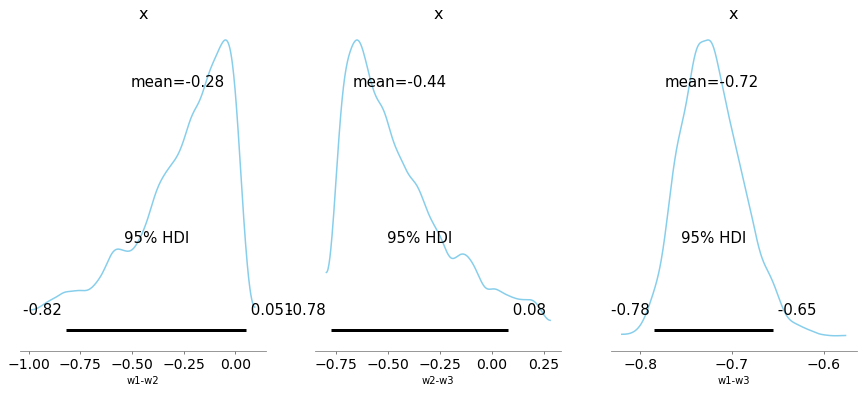

In [160]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
az.plot_posterior(w1_sample-w2_sample, ax=ax[0], color='skyblue',hdi_prob=0.95)
ax[0].set_xlabel(r'w1-w2')
az.plot_posterior(w2_sample-w3_sample, ax=ax[1], color='skyblue',hdi_prob=0.95)
ax[1].set_xlabel(r'w2-w3')
az.plot_posterior(w1_sample-w3_sample, ax=ax[2], color='skyblue',hdi_prob=0.95)
ax[2].set_xlabel(r'w1-w3')

Text(0.5, 0, 'c1-c3')

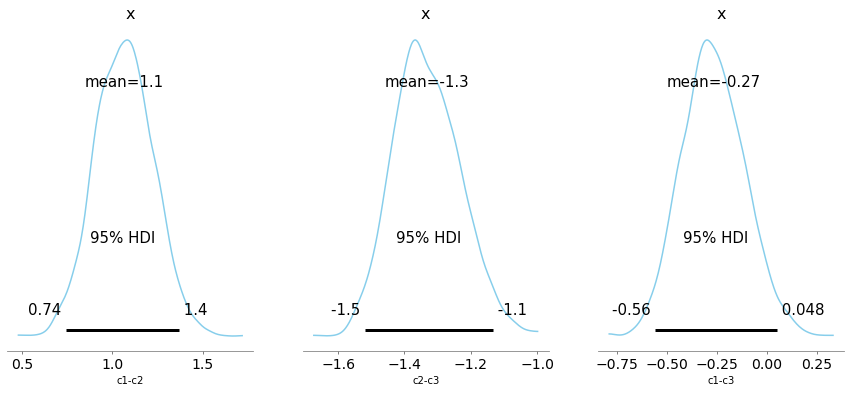

In [159]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
az.plot_posterior(c1_sample-c2_sample, ax=ax[0], color='skyblue',hdi_prob=0.95)
ax[0].set_xlabel(r'c1-c2')
az.plot_posterior(c2_sample-c3_sample, ax=ax[1], color='skyblue',hdi_prob=0.95)
ax[1].set_xlabel(r'c2-c3')
az.plot_posterior(c1_sample-c3_sample, ax=ax[2], color='skyblue',hdi_prob=0.95)
ax[2].set_xlabel(r'c1-c3')

# Interpretation of the Results


# Group 1
In Group 1 , we observe that the credible value of w to be incredibly low and c to have a similar value as in the first Model. This implies that Group 1 which is making Error in Stimuli 2nd and 7th has a huge bias towards the dimension 'Height'. This makes sense as the height of 2nd and 7th Stimuli is approximately same.

# Group 2
In Group 2 , we observe that the credible value of w to be  low and c to have a very low value. Also,the 95% HDI are considerably wider than in the other 2 groups. A low value of c indicates that the similarity between 2 categories assigned would be high, which would then make the probability approximately equal for all the stimuli. This can be seen from the values of r in the model. All the values of r are near 0.5

Therefore, given the
    1)Uncertainity in the values of w and c,
    2)The low value of 'c,
    3)Approximately equal probabilities of classification for each stimuli, 
It could be said the participants in this group are classifying randomly without any strict logic.

# Group 3
In Group 3 , we observe that the credible value of w to be high and c to have a similar value as in the first Model. 

This group contained the particpants which classified most of the stimuli's correctly. We also see that this group has a strong bias towards the dimension 'Position'.

I have also plotted 95% HDI Plots to see the difference between Parameter Values of 3 models.

In case of parameter 'w', we see that 95% HDI for w1-w3 doesn't contain 0. This indicates that 0 is not a very credible value for the difference between parameters of Group 1 and 3 and therefore, the difference is 'credible'

Similarly the difference in parameter values of 'c' seems to be credible only in case of Group 1 & 2, Group 2&3.
 



# Joint Hierarchical Model for the 3 Groups

Besides Modelling the 3 groups independently, I have also tried to Model the 3 groups together in a Hierarchical Model

In [ ]:
#Heirarchical Model


p=[[34, 21, 47,  6, 39,  5, 40, 20], [23, 25, 30, 25, 37, 29, 27, 26], [188, 172, 178,  95, 106,  37,  35,  19]]
z1 = [item for sublist in p for item in sublist]
d1=np.array(dict['d1'])
d2=np.array(dict['d2'])


with pm.Model() as model7:
    mean_w=pm.Beta('mean_w',6,4)
    sd_w=pm.Gamma('sd_w',1,1)
    w=pm.Beta('w',alpha=mean_w*sd_w,beta=(1-mean_w)*sd_w,shape=3)
    mean_c=pm.Normal('mean_c',1,1)
    c=pm.Exponential('c',1/mean_c,shape=3)
    
    d3_a0=(w[0]*d1[:,[0,1,2,4]]+(1-w[0])*d2[:,[0,1,2,4]])
    s10=np.exp(-c[0]*d3_a0)
    d3_b0=(w[0]*d1[:,[3,5,6,7]]+(1-w[0])*d2[:,[3,5,6,7]])
    s20=np.exp(-c[0]*d3_b0)
    s_a0=s10.sum(axis=1)
    s_b0=s20.sum(axis=1)
    
    d3_a1=(w[1]*d1[:,[0,1,2,4]]+(1-w[1])*d2[:,[0,1,2,4]])
    s11=np.exp(-c[1]*d3_a1)
    d3_b1=(w[1]*d1[:,[3,5,6,7]]+(1-w[1])*d2[:,[3,5,6,7]])
    s21=np.exp(-c[1]*d3_b1)
    s_a1=s11.sum(axis=1)
    s_b1=s21.sum(axis=1)
    
    d3_a2=(w[2]*d1[:,[0,1,2,4]]+(1-w[2])*d2[:,[0,1,2,4]])
    s13=np.exp(-c[2]*d3_a2)
    d3_b2=(w[2]*d1[:,[3,5,6,7]]+(1-w[2])*d2[:,[3,5,6,7]])
    s23=np.exp(-c[2]*d3_b2)
    s_a2=s13.sum(axis=1)
    s_b2=s23.sum(axis=1)
    
    r1=(s_a0)/(s_a0+s_b0)
    r2=(s_a1)/(s_a1+s_b1)
    r3=(s_a2)/(s_a2+s_b2)
    
    y_1=pm.Binomial('y_1',n=56,p=r1,observed=l1)
    y_2=pm.Binomial('y_2',n=56,p=r2,observed=l2)
    y_3=pm.Binomial('y_3',n=208,p=r3,observed=l3)
    trace_3=pm.sample(4000,target_accept=0.96,return_inferencedata=False,random_seed=10) 
 

# Justification for the Priors

After observing the results from 3 independent models, I decided to keep the distribution of w and c as same but introduced hyperpriors to model the 3 groups in my data.

Hyperpriors of w and c are reparameterized in suitable forms and assigned sensible value for their distribution as per past results in the models.

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mean_c'}>,
        <AxesSubplot:title={'center':'mean_w'}>,
        <AxesSubplot:title={'center':'sd_w'}>],
       [<AxesSubplot:title={'center':'w\n0'}>,
        <AxesSubplot:title={'center':'w\n1'}>,
        <AxesSubplot:title={'center':'w\n2'}>],
       [<AxesSubplot:title={'center':'c\n0'}>,
        <AxesSubplot:title={'center':'c\n1'}>,
        <AxesSubplot:title={'center':'c\n2'}>]], dtype=object)

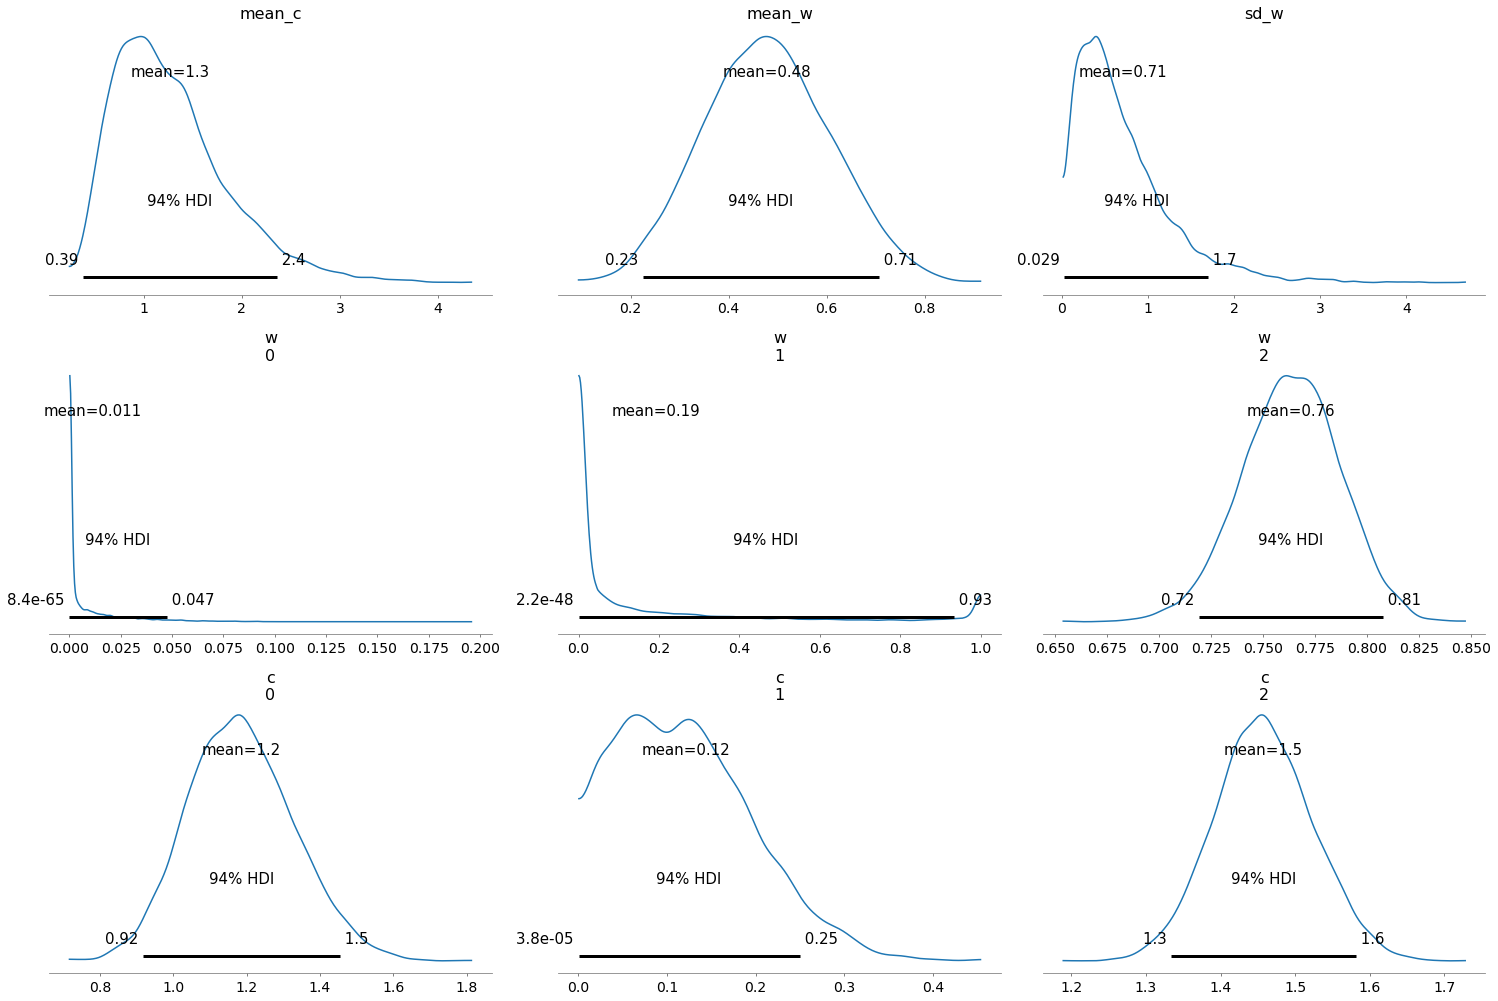

In [171]:
az.plot_posterior(trace_3)

A quick glance on the plots will show that the Hierarchical Model is showing similar results as the 3 independent models.
However,there seems to be some divergences in the chains. I take a look at traceplot to see if there is a siginifcant problem.

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mean_c'}>,
        <AxesSubplot:title={'center':'mean_c'}>],
       [<AxesSubplot:title={'center':'mean_w'}>,
        <AxesSubplot:title={'center':'mean_w'}>],
       [<AxesSubplot:title={'center':'sd_w'}>,
        <AxesSubplot:title={'center':'sd_w'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'w'}>],
       [<AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'c'}>]], dtype=object)

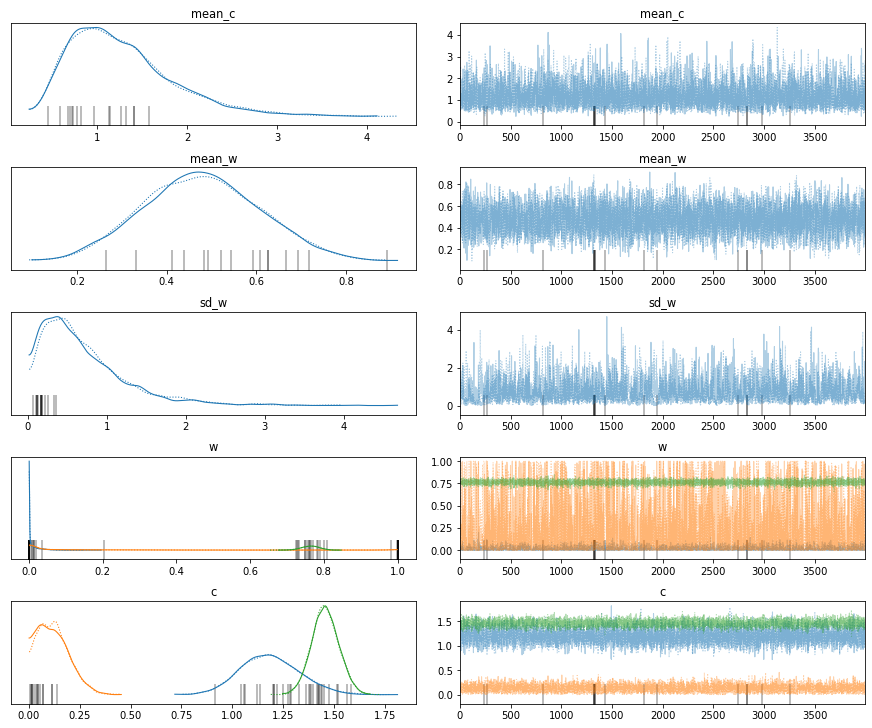

In [173]:
pm.traceplot(trace_3)

There doesn't seem to be a significant divergence in the chains so it shouldn't be a big cause of worry.

# Exploring Differences Across the 3 Groups

In [174]:
az.summary(trace_3)

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mean_c,1.273,0.580,0.386,2.356,0.009,0.007,3844.0,3122.0,5117.0,3179.0,1.00
mean_w,0.479,0.129,0.226,0.706,0.002,0.001,5907.0,5777.0,5897.0,5326.0,1.00
sd_w,0.711,0.551,0.029,1.701,0.013,0.009,1730.0,1730.0,895.0,857.0,1.01
w[0],0.011,0.018,0.000,0.047,0.000,0.000,4649.0,4649.0,807.0,287.0,1.01
w[1],0.193,0.289,0.000,0.932,0.006,0.004,2584.0,2478.0,1118.0,775.0,1.01
w[2],0.763,0.024,0.719,0.807,0.000,0.000,7303.0,7303.0,7310.0,5545.0,1.00
c[0],1.185,0.144,0.917,1.456,0.002,0.001,7328.0,7302.0,7283.0,5549.0,1.00
c[1],0.122,0.076,0.000,0.250,0.001,0.001,3909.0,3909.0,3123.0,2634.0,1.00
c[2],1.457,0.066,1.334,1.582,0.001,0.001,6918.0,6918.0,6887.0,4733.0,1.00


In [175]:
w1_sample = trace_3['w'][:,0]
w2_sample = trace_3['w'][:,1]
w3_sample = trace_3['w'][:,2]

c1_sample = trace_3['c'][:,0]
c2_sample = trace_3['c'][:,1]
c3_sample = trace_3['c'][:,2]

Text(0.5, 0, 'w1-w3')

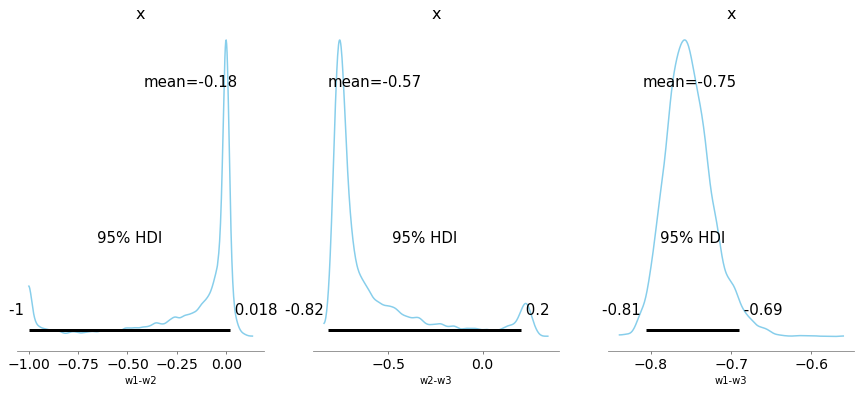

In [176]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
az.plot_posterior(w1_sample-w2_sample, ax=ax[0], color='skyblue',hdi_prob=0.95)
ax[0].set_xlabel(r'w1-w2')
az.plot_posterior(w2_sample-w3_sample, ax=ax[1], color='skyblue',hdi_prob=0.95)
ax[1].set_xlabel(r'w2-w3')
az.plot_posterior(w1_sample-w3_sample, ax=ax[2], color='skyblue',hdi_prob=0.95)
ax[2].set_xlabel(r'w1-w3')

Text(0.5, 0, 'c1-c3')

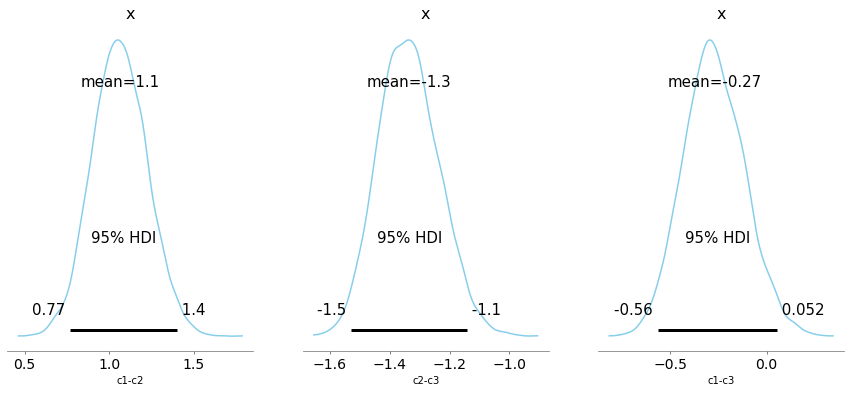

In [177]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
az.plot_posterior(c1_sample-c2_sample, ax=ax[0], color='skyblue',hdi_prob=0.95)
ax[0].set_xlabel(r'c1-c2')
az.plot_posterior(c2_sample-c3_sample, ax=ax[1], color='skyblue',hdi_prob=0.95)
ax[1].set_xlabel(r'c2-c3')
az.plot_posterior(c1_sample-c3_sample, ax=ax[2], color='skyblue',hdi_prob=0.95)
ax[2].set_xlabel(r'c1-c3')

Here, results are again similar to what we saw for the 3 independent models.

# Dependency Diagram of the Hierarchical Model

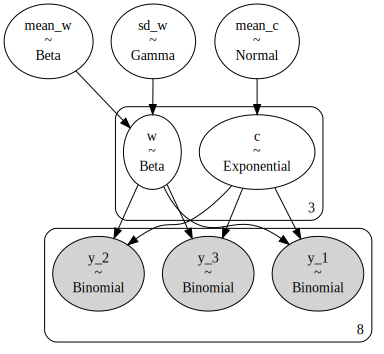

In [178]:
pm.model_to_graphviz(model7)

# d)

I take the prior of b as Beta Distribution to check what happens if b is made a free parameter. I have assigned suitable Hyperpriors for Beta Distribution based on the previous results

In [182]:
 with pm.Model() as model3:
    mean_w=pm.Beta('mean_w',6,4)
    sd_w=pm.Gamma('sd_w',1,1)
    w=pm.Beta('w',alpha=mean_w*sd_w,beta=(1-mean_w)*sd_w,shape=3)
    mean_c=pm.Normal('mean_c',1,1)
    c=pm.Exponential('c',1/mean_c,shape=3)
    mean_b=pm.Beta('mean_b',4,4)
    sd_b=pm.Gamma('sd_b',1,1)
    b=pm.Beta('b',alpha=mean_b*sd_b,beta=(1-mean_b)*sd_b,shape=3)
    
    d3_a0=(w[0]*d1[:,[0,1,2,4]]+(1-w[0])*d2[:,[0,1,2,4]])
    s10=np.exp(-c[0]*d3_a0)
    d3_b0=(w[0]*d1[:,[3,5,6,7]]+(1-w[0])*d2[:,[3,5,6,7]])
    s20=np.exp(-c[0]*d3_b0)
    s_a0=s10.sum(axis=1)
    s_b0=s20.sum(axis=1)
    
    d3_a1=(w[1]*d1[:,[0,1,2,4]]+(1-w[1])*d2[:,[0,1,2,4]])
    s11=np.exp(-c[1]*d3_a1)
    d3_b1=(w[1]*d1[:,[3,5,6,7]]+(1-w[1])*d2[:,[3,5,6,7]])
    s21=np.exp(-c[1]*d3_b1)
    s_a1=s11.sum(axis=1)
    s_b1=s21.sum(axis=1)
    
    d3_a2=(w[2]*d1[:,[0,1,2,4]]+(1-w[2])*d2[:,[0,1,2,4]])
    s13=np.exp(-c[2]*d3_a2)
    d3_b2=(w[2]*d1[:,[3,5,6,7]]+(1-w[2])*d2[:,[3,5,6,7]])
    s23=np.exp(-c[2]*d3_b2)
    s_a2=s13.sum(axis=1)
    s_b2=s23.sum(axis=1)
    
    
    r1=(b[0]*s_a0)/(b[0]*s_a0+(1-b[0])*s_b0)
    r2=(b[1]*s_a1)/(b[1]*s_a1+(1-b[1])*s_b1)
    r3=(b[2]*s_a2)/(b[2]*s_a2+(1-b[2])*s_b2)
    
    y_1=pm.Binomial('y_1',n=56,p=r1,observed=l1)
    y_2=pm.Binomial('y_2',n=56,p=r2,observed=l2)
    y_3=pm.Binomial('y_3',n=208,p=r3,observed=l3)
    
    trace_4=pm.sample(4000,target_accept=0.96,return_inferencedata=False,random_seed=10) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, sd_b, mean_b, c, mean_c, w, sd_w, mean_w]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 173 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mean_c'}>,
        <AxesSubplot:title={'center':'mean_w'}>,
        <AxesSubplot:title={'center':'sd_w'}>,
        <AxesSubplot:title={'center':'w\n0'}>],
       [<AxesSubplot:title={'center':'w\n1'}>,
        <AxesSubplot:title={'center':'w\n2'}>,
        <AxesSubplot:title={'center':'c\n0'}>,
        <AxesSubplot:title={'center':'c\n1'}>],
       [<AxesSubplot:title={'center':'c\n2'}>,
        <AxesSubplot:title={'center':'mean_b'}>,
        <AxesSubplot:title={'center':'sd_b'}>,
        <AxesSubplot:title={'center':'b\n0'}>],
       [<AxesSubplot:title={'center':'b\n1'}>,
        <AxesSubplot:title={'center':'b\n2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

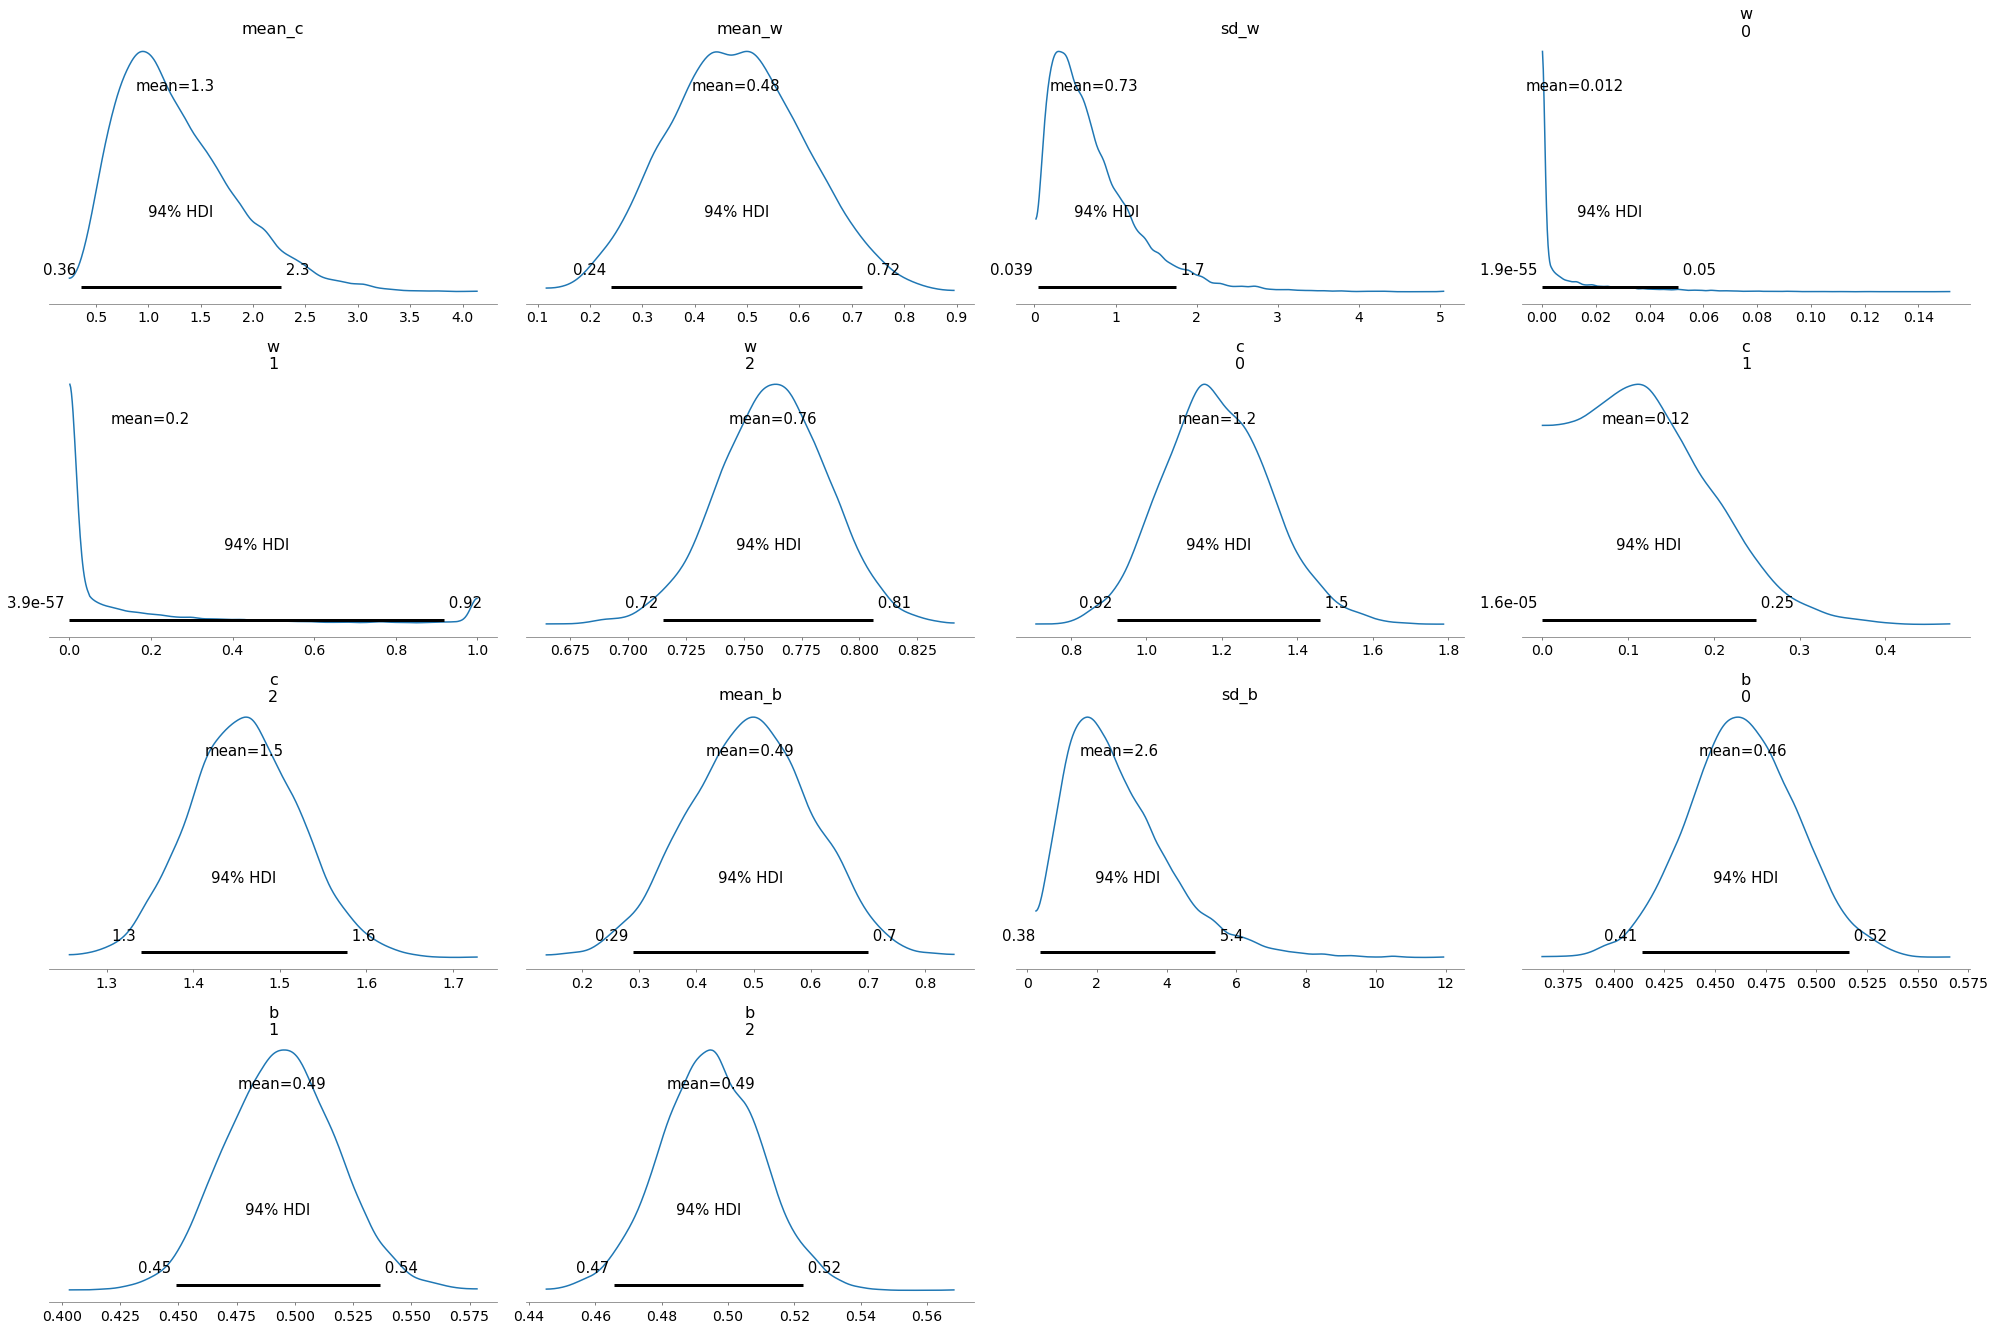

In [183]:
az.plot_posterior(trace_4)

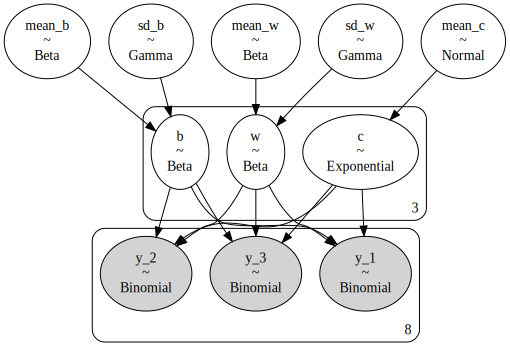

In [184]:
pm.model_to_graphviz(model3)

We observe that even if b is assigned to be a free parameter, the credible value of b for all cases comes out to be 0.46,0.49 and 0.49 which are very close to 0.5 and their 94% HDI also has a short length indicating the high certainity of the credible value.

I checked it for the first model as well( considered in part a)  and same results were observed-

P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, c, w]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 30 seconds.
P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'w'}>,
       <AxesSubplot:title={'center':'c'}>,
       <AxesSubplot:title={'center':'b'}>], dtype=object)

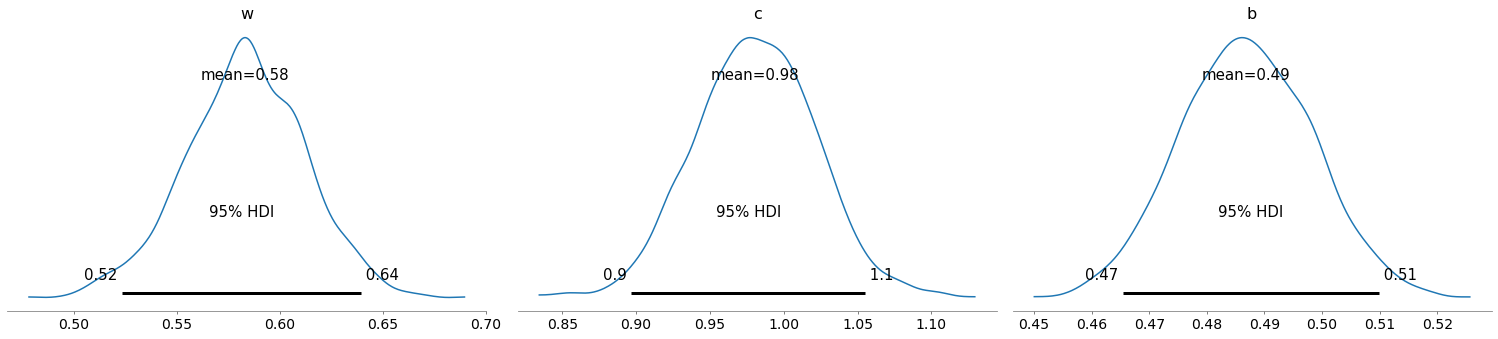

In [187]:
 with pm.Model() as model5:
  w=pm.Beta('w',4,4)
  c=pm.Exponential('c',1)
  d3_a=(w*d1[:,[0,1,2,4]]+(1-w)*d2[:,[0,1,2,4]])
  s1=np.exp(-c*d3_a)
  d3_b=(w*d1[:,[3,5,6,7]]+(1-w)*d2[:,[3,5,6,7]])
  s2=np.exp(-c*d3_b)
  s_a=s1.sum(axis=1)
  s_b=s2.sum(axis=1)
  b = pm.Beta('b', alpha=1, beta=1)   
  r=(b*s_a)/(b*s_a+(1-b)*s_b)
  y_i=pm.Binomial('y_i',n=320,p=r,observed=y)
  trace_5 = pm.sample(1000)

az.plot_posterior(trace_5,hdi_prob=0.95)

# e)

I now plot Posterior- Predictive Plots of 

    1) 3 Independent Models for the Groups
    2) Joint Hierarchical Model for 3 groups
    3) Simple Model with b as a free parameter

In [188]:
with model21:
      ppc1 = pm.sample_posterior_predictive(
              trace_21, random_seed=10
      )
        
with model22:
      ppc2 = pm.sample_posterior_predictive(
              trace_22, random_seed=10
      )        
with model23:
      ppc3 = pm.sample_posterior_predictive(
              trace_23, random_seed=10
      )        

with model5:
      ppc5 = pm.sample_posterior_predictive(
              trace_5, random_seed=10
      )        

In [212]:
with model7:
      ppc4 = pm.sample_posterior_predictive(
              trace_3, random_seed=10
      )

For 3 Indpendent Models

<AxesSubplot:xlabel='y_3'>

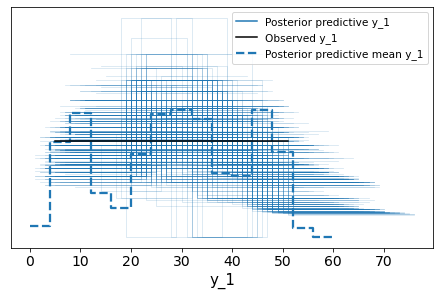

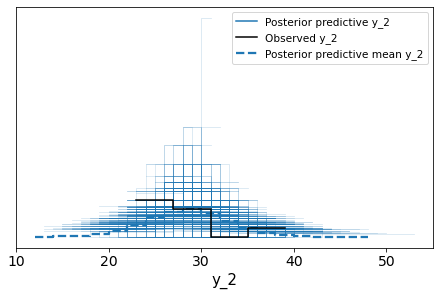

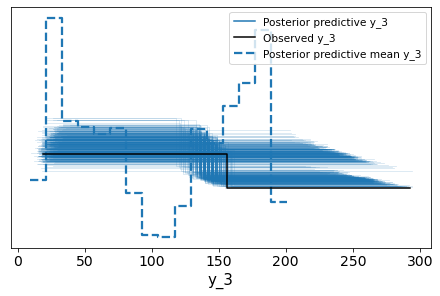

In [190]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc1, model=model21),num_pp_samples=700)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc2, model=model22),num_pp_samples=700)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc3, model=model23),num_pp_samples=700)

For Hierarchical Model

array([<AxesSubplot:xlabel='y_1'>, <AxesSubplot:xlabel='y_2'>,
       <AxesSubplot:xlabel='y_3'>], dtype=object)

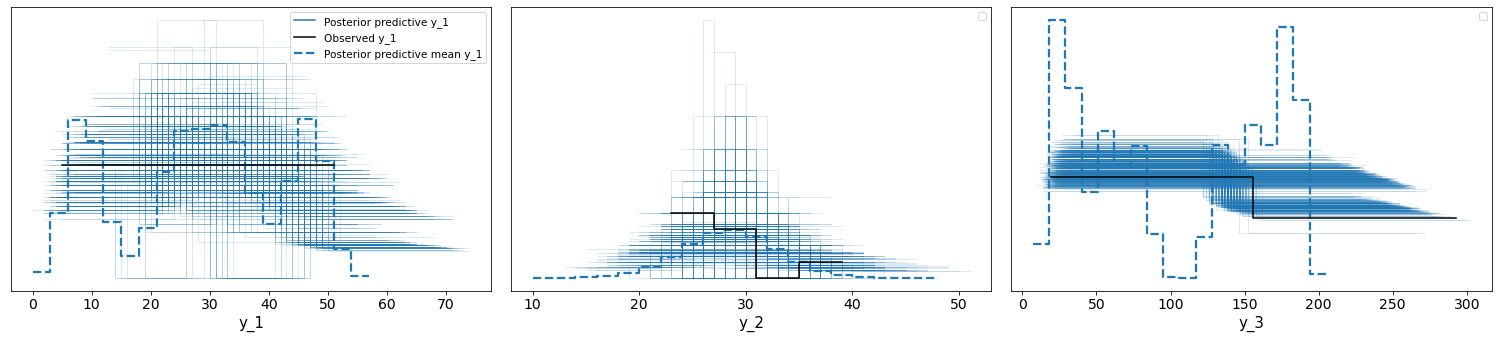

In [215]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc4, model=model3),grid=(1,3),num_pp_samples=700)

For Simple Model

<AxesSubplot:xlabel='y_i'>

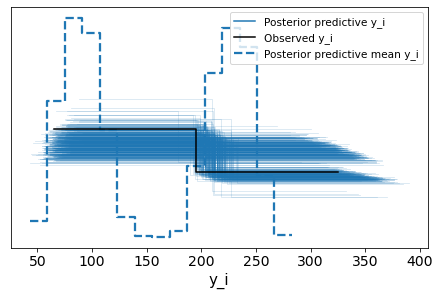

In [211]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc5, model=model5),num_pp_samples=700)

Hierarchical Model and the 3 Independent Model seem to perform similarly but the Posterior-Predictive fit for both of them doesn't look good. 
I therefore consider a different likelihood function. 

In [220]:
with pm.Model() as model8:
    mean_w=pm.Beta('mean_w',6,4)
    sd_w=pm.Gamma('sd_w',1,1)
    w=pm.Beta('w',alpha=mean_w*sd_w,beta=(1-mean_w)*sd_w,shape=3)
    mean_c=pm.Normal('mean_c',1,1)
    c=pm.Exponential('c',1/mean_c,shape=3)
    
    d3_a0=(w[0]*d1[:,[0,1,2,4]]+(1-w[0])*d2[:,[0,1,2,4]])
    s10=np.exp(-c[0]*d3_a0)
    d3_b0=(w[0]*d1[:,[3,5,6,7]]+(1-w[0])*d2[:,[3,5,6,7]])
    s20=np.exp(-c[0]*d3_b0)
    s_a0=s10.sum(axis=1)
    s_b0=s20.sum(axis=1)
    
    d3_a1=(w[1]*d1[:,[0,1,2,4]]+(1-w[1])*d2[:,[0,1,2,4]])
    s11=np.exp(-c[1]*d3_a1)
    d3_b1=(w[1]*d1[:,[3,5,6,7]]+(1-w[1])*d2[:,[3,5,6,7]])
    s21=np.exp(-c[1]*d3_b1)
    s_a1=s11.sum(axis=1)
    s_b1=s21.sum(axis=1)
    
    d3_a2=(w[2]*d1[:,[0,1,2,4]]+(1-w[2])*d2[:,[0,1,2,4]])
    s13=np.exp(-c[2]*d3_a2)
    d3_b2=(w[2]*d1[:,[3,5,6,7]]+(1-w[2])*d2[:,[3,5,6,7]])
    s23=np.exp(-c[2]*d3_b2)
    s_a2=s13.sum(axis=1)
    s_b2=s23.sum(axis=1)
    
    r1=(s_a0)/(s_a0+s_b0)
    r2=(s_a1)/(s_a1+s_b1)
    r3=(s_a2)/(s_a2+s_b2)
    
    y_1=pm.Normal('y_1',mu=56*r1,sigma=(56*r1*(1-r1))**0.5,observed=l1)
    y_2=pm.Normal('y_2',mu=56*r2,sigma=(56*r2*(1-r2))**0.5,observed=l2)
    y_3=pm.Normal('y_3',mu=208*r3,sigma=(208*r3*(1-r3))**0.5,observed=l3)
    trace_6=pm.sample(4000,target_accept=0.96,return_inferencedata=False,random_seed=10) 
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, mean_c, w, sd_w, mean_w]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 199 seconds.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mean_c'}>,
        <AxesSubplot:title={'center':'mean_c'}>],
       [<AxesSubplot:title={'center':'mean_w'}>,
        <AxesSubplot:title={'center':'mean_w'}>],
       [<AxesSubplot:title={'center':'sd_w'}>,
        <AxesSubplot:title={'center':'sd_w'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'w'}>],
       [<AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'c'}>]], dtype=object)

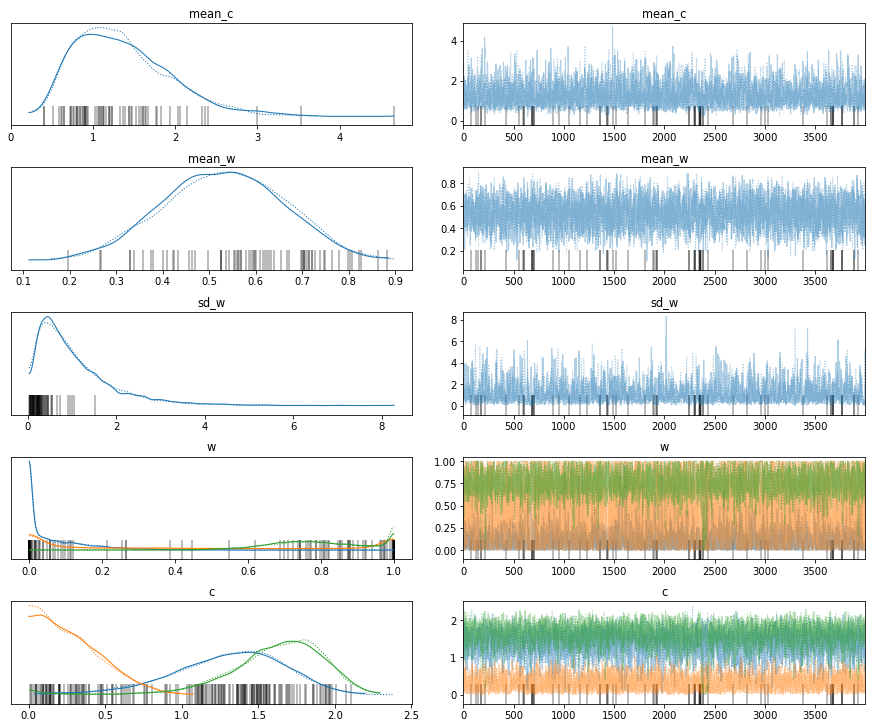

In [217]:
pm.traceplot(trace_6)

array([<AxesSubplot:xlabel='y_1'>, <AxesSubplot:xlabel='y_2'>,
       <AxesSubplot:xlabel='y_3'>], dtype=object)

P:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


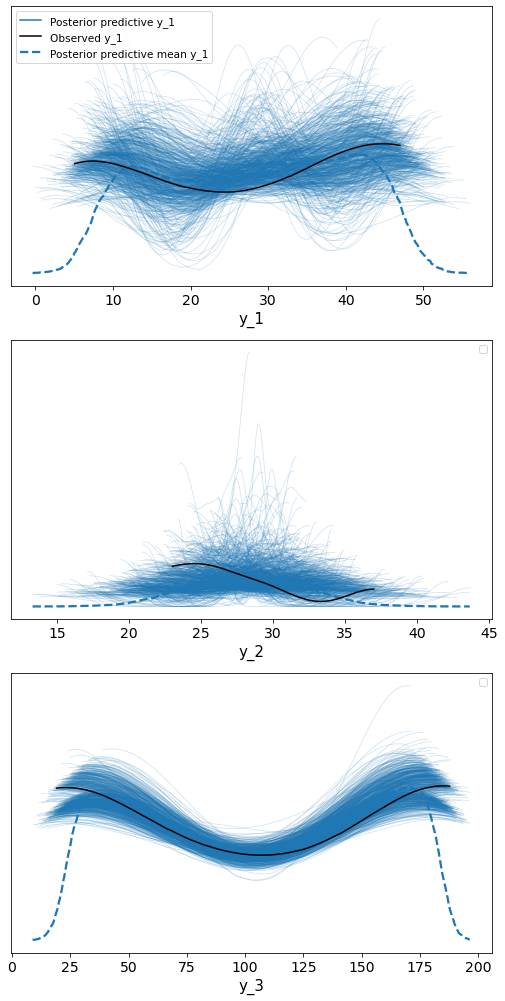

In [222]:
with model8:
      ppc6 = pm.sample_posterior_predictive(
              trace_6, random_seed=10
      )
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc6, model=model8),num_pp_samples=700,grid=(3,1))        

We see that although the Posterior-Predictive Plots are performing better than in the case of Binomial Liklihood but the 
number of divergences has also increased. However, by looking at the traceplot one can see that there is not a significant
divergence.
I now try the Normal Likelihood Function in case of 3 Independent Models


Considering 3 Independent Models

In [224]:
with pm.Model() as model91:
      w=pm.Beta('w',1,1)
      c=pm.Exponential('c',1)
      d3_a=(w*d1[:,[0,1,2,4]]+(1-w)*d2[:,[0,1,2,4]])
      s1=np.exp(-c*d3_a)
      d3_b=(w*d1[:,[3,5,6,7]]+(1-w)*d2[:,[3,5,6,7]])
      s2=np.exp(-c*d3_b)
      s_a=s1.sum(axis=1)
      s_b=s2.sum(axis=1)
      b1 = 0.5
      r1=pm.Deterministic('r1',(b1*s_a)/(b1*s_a+(1-b1)*s_b))
      y_1=pm.Normal('y_1',mu=56*r1,sigma=(56*r1*(1-r1))**0.5,observed=l1)
      trace_91=pm.sample(2000)


with pm.Model() as model92:
      w=pm.Beta('w',1,1)
      c=pm.Exponential('c',1)
      d3_a=(w*d1[:,[0,1,2,4]]+(1-w)*d2[:,[0,1,2,4]])
      s1=np.exp(-c*d3_a)
      d3_b=(w*d1[:,[3,5,6,7]]+(1-w)*d2[:,[3,5,6,7]])
      s2=np.exp(-c*d3_b)
      s_a=s1.sum(axis=1)
      s_b=s2.sum(axis=1)
      b2 =0.5
      r2=pm.Deterministic('r2',(b2*s_a)/(b2*s_a+(1-b2)*s_b))
      y_2=pm.Normal('y_2',mu=56*r2,sigma=(56*r2*(1-r2))**0.5,observed=l2)
      trace_92=pm.sample(2000)  
  


with pm.Model() as model93:
      w=pm.Beta('w',8,8)
      c=pm.Exponential('c',1)
      d3_a=(w*d1[:,[0,1,2,4]]+(1-w)*d2[:,[0,1,2,4]])
      s1=np.exp(-c*d3_a)
      d3_b=(w*d1[:,[3,5,6,7]]+(1-w)*d2[:,[3,5,6,7]])
      s2=np.exp(-c*d3_b)
      s_a=s1.sum(axis=1)
      s_b=s2.sum(axis=1)
      b3 = 0.5
      r3=pm.Deterministic('r3',(b3*s_a)/(b3*s_a+(1-b3)*s_b))
      y_3=pm.Normal('y_3',mu=208*r3,sigma=(208*r3*(1-r3))**0.5,observed=l3)
      trace_93=pm.sample(2000)  
  
    

P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 36 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 34 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 149 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6340458290506928, but should be close to 0.8. Try to increase the number of tuning steps.
P:\Anaconda\lib\site-packages\pymc3\sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 34 seconds.


In [225]:
with model91:
      ppc7 = pm.sample_posterior_predictive(
              trace_91, random_seed=10
      )
        
with model92:
      ppc8 = pm.sample_posterior_predictive(
              trace_92, random_seed=10
      )        
with model93:
      ppc9 = pm.sample_posterior_predictive(
              trace_93, random_seed=10
      ) 

For 3 Independent Models

<AxesSubplot:xlabel='y_3'>

P:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


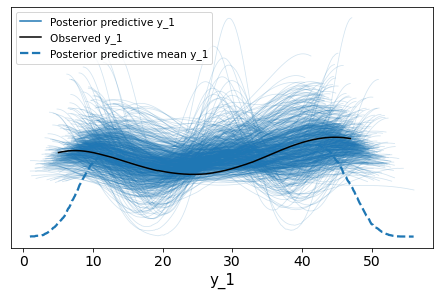

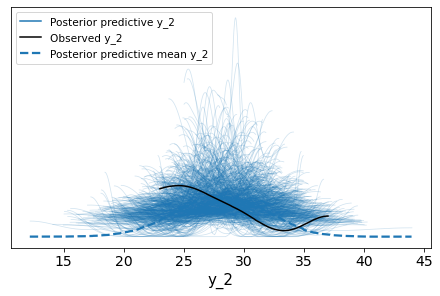

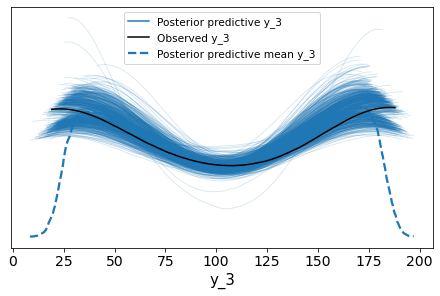

In [227]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc7, model=model91),num_pp_samples=700)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc8, model=model92),num_pp_samples=700)
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc9, model=model93),num_pp_samples=700)

So, both Joint Hierarchical Model and 3 Independent Models are performing almost identically here. Since the 3 Independent
Models do not have any divergences, it is better to proceed with the 3 Independent Models for further analysis.

Now, one could also consider Gamma Distribution in the Likelihood Function and they would get similar results as obtained in Normal Distribution. 

Instead of repeatedly using the 3 Independent Models, I  used different Likelihood function on the baseline model used in Part a. The results for that model can be observed in the Rough Work Section.

I think those results could be genearlized to the case of 3 independent models as well. In case of the baseline model, it was observed that WAIC gave a warning and mentioned that the results are unreliable. Due to this reason, Model Comparision using WAIC was avoided here.

Therefore,I decided to do Model Comparision on the basis of the Post-Predictive Plots and overall results. I belive that the 3 Independent Models with Normal Liklihood Function(Model 91, Model 92 and Model 93) are the best Models as 
   
    1) They don't show any divergences
    
    2) Post-Predictive Plot is better than Binomial and Similar to Gamma Distribution




# Rough Work

In [ ]:
#  with pm.Model() as model4:
#   w=pm.Beta('w',6,4)
#   c=pm.Exponential('c',1)
#   d3_a=(w*d1[[0,1,2,4]]+(1-w)*d2[[0,1,2,4]])
#   s1=np.exp(-c*d3_a)
#   d3_b=(w*d1[[3,5,6,7]]+(1-w)*d2[[3,5,6,7]])
#   s2=np.exp(-c*d3_b)
#   s_a=s1.sum(axis=1)
#   s_b=s2.sum(axis=1)
#   b = pm.Beta('b', alpha=2, beta=2)  
#   r=pm.Deterministic('r',(b*s_a)/(b*s_a+(1-b)*s_b))
#   y_i=pm.Gamma('y_i',alpha=(320*r)**2/(320*r*(1-r)),beta=320*r/(320*r*(1-r)),observed=y)
#   trace_5 = pm.sample(1000)

# az.plot_posterior(trace_5)

<AxesSubplot:xlabel='y_i'>

P:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


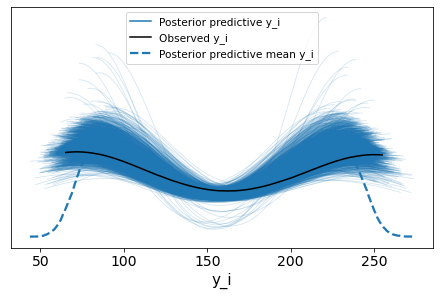

In [53]:
# with model4:
#       ppc5 = pm.sample_posterior_predictive(
#               trace_5, random_seed=10
#       )
# az.plot_ppc(az.from_pymc3(posterior_predictive=ppc5, model=model4))   

In [ ]:
#  with pm.Model() as model5:
#   w=pm.Beta('w',6,4)
#   c=pm.Exponential('c',1)
#   d3_a=(w*d1[[0,1,2,4]]+(1-w)*d2[[0,1,2,4]])
#   s1=np.exp(-c*d3_a)
#   d3_b=(w*d1[[3,5,6,7]]+(1-w)*d2[[3,5,6,7]])
#   s2=np.exp(-c*d3_b)
#   s_a=s1.sum(axis=1)
#   s_b=s2.sum(axis=1)
#   b = pm.Beta('b', alpha=2, beta=2)  
#   r=pm.Deterministic('r',(b*s_a)/(b*s_a+(1-b)*s_b))
#   y_i=pm.Normal('y_i',mu=(320*r),sigma=(320*r*(1-r))**0.5,observed=y)
#   trace_6 = pm.sample(1000)

# az.plot_posterior(trace_6)

<AxesSubplot:xlabel='y_i'>

P:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


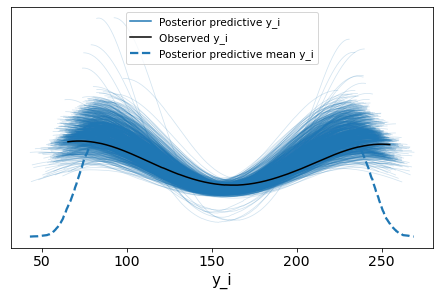

In [46]:
# with model5:
#       ppc6 = pm.sample_posterior_predictive(
#               trace_5, random_seed=10
#       )
# az.plot_ppc(az.from_pymc3(posterior_predictive=ppc6, model=model5),num_pp_samples=1000)  

P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


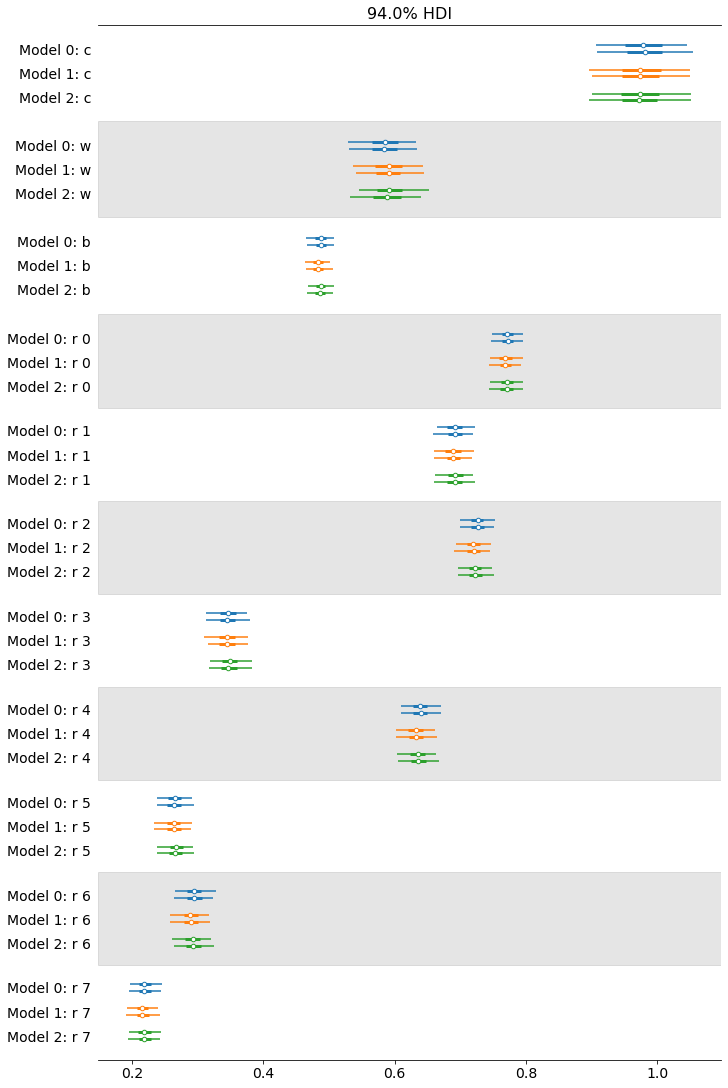

In [83]:
# traces = [trace_4, trace_5, trace_6]
# az.plot_forest(traces, figsize=(10,15));

In [86]:
df_comp_loo = az.compare({"Binomial": trace_4, "Gamma": trace_5,"Normal":trace_6},ic='waic')
df_comp_loo

P:\Anaconda\lib\site-packages\arviz\stats\stats.py:146: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
P:\Anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
P:\Anaconda\lib\site-packages\arviz\stats\stats.py:692: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should 

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Binomial,0,-42.889238,9.091280,0.000000,1.000000e+00,5.987611,0.000000,False,log
Normal,1,-43.000094,9.275022,0.110856,0.000000e+00,6.109696,0.460061,True,log
Gamma,2,-43.086107,9.399386,0.196869,3.330669e-16,6.110748,0.347916,True,log


In [33]:
# ppc_w = pm.sample_posterior_predictive_w(
#     traces,
#     1000,
#     [model3, model4, model5],
#     weights=df_comp_loo.weight.sort_index(ascending=True),
#     progressbar=True,
# )

<AxesSubplot:xlabel='y_i'>

P:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


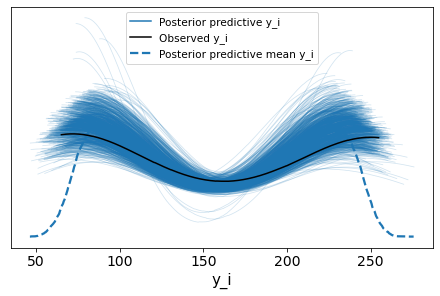

In [49]:
#Model Averaging
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc_w,model=model3),num_pp_samples=1000)  